In [1]:
import phate
import scprep
import seaborn as sns
import os
import json
from PIL import Image, ImageDraw
import re
import numpy as np
import cv2
import imageio
import matplotlib.pyplot as plt
import tifffile as tiff
from tqdm import tqdm
from skimage.exposure import equalize_adapthist
from scipy.stats import stats
import matplotlib.animation as animation
import pandas as pd
import csv
import shutil
from skimage.morphology import dilation, erosion
import numpy as np
import matplotlib.pyplot as plt
import imageio
from skimage import measure
from skimage.measure import regionprops, label
from scipy.spatial import distance
import time
import datetime
from mpl_toolkits.mplot3d import Axes3D  # 3D Plotting
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.metrics import mean_squared_error, r2_score



In [2]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
from xgboost import XGBRegressor

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from itertools import product

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np



# Regression Analysis

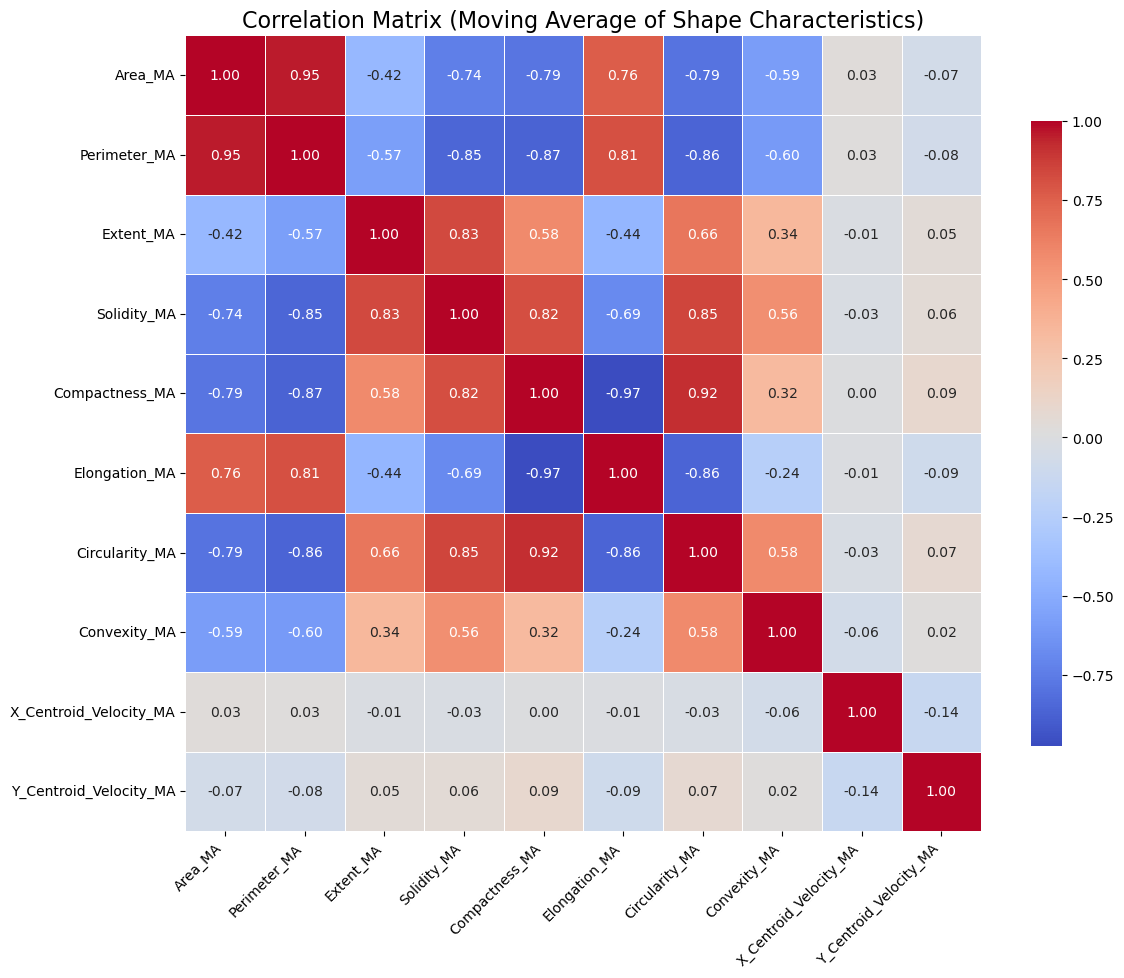

In [3]:


# Define paths

window_size = 5  # Change if 
# output_directory = "/home/MinaHossain/EmbedTrack/Cell_Frame-Video/Track_New_Output"
# csv_path = os.path.join(output_directory, f"Cells_Centroid_Velocity_TrueLabel_MA_Median_{window_size}.csv")


output_directory = "/home/MinaHossain/EmbedTrack/Track_New_Result_Shape/Mean"
csv_path = os.path.join(output_directory, f"Cells_Centroid_Velocity_TrueLabel_MA_Mean_{window_size}.csv")



# Load the CSV
df = pd.read_csv(csv_path)

# Define the columns of interest
columns_of_interest = [
    "Area_MA", "Perimeter_MA", "Extent_MA", "Solidity_MA", "Compactness_MA",
    "Elongation_MA", "Circularity_MA", "Convexity_MA",
    "X_Centroid_Velocity_MA", "Y_Centroid_Velocity_MA"]

# columns_of_interest = [
#     "Area", "Perimeter", "Extent", "Solidity", "Compactness",
#     "Elongation", "Circularity", "Convexity",
#     "X_Centroid_Velocity", "Y_Centroid_Velocity"]

# Compute the correlation matrix
correlation_matrix = df[columns_of_interest].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True,
            cbar_kws={"shrink": 0.75}, linewidths=0.5)

plt.title(f"Correlation Matrix (Moving Average of Shape Characteristics)", fontsize=16)
# plt.title(f"Correlation Matrix (Original Shape Characteristics)", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Save the plot (optional)
plot_path = os.path.join(output_directory, f"Correlation_Matrix_MA.png")
# plot_path = os.path.join(output_directory, f"Correlation_Matrix_Original.png")
plt.savefig(plot_path, dpi=300)

# Show plot
plt.show()


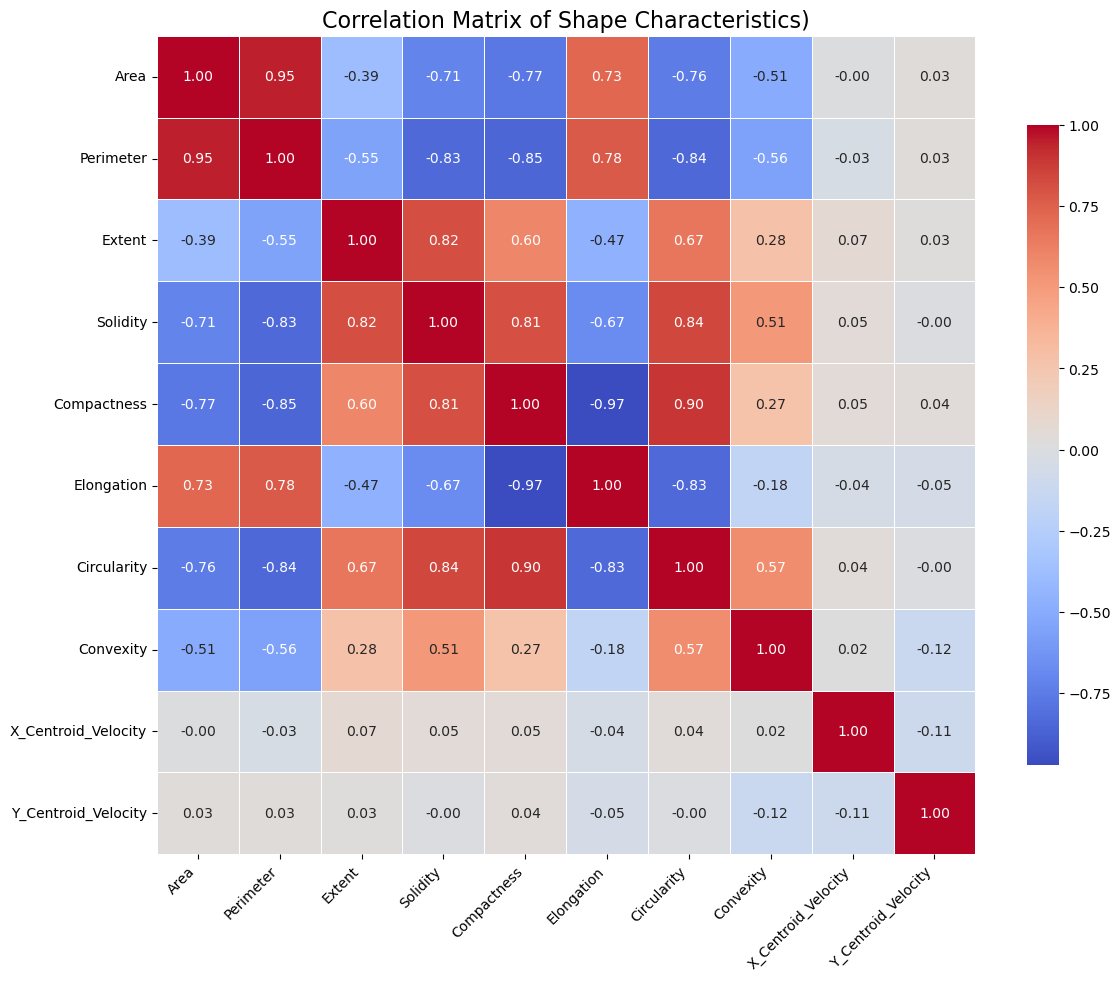

In [4]:

# Define paths
window_size = 5  # Change if needed

# output_directory = "/home/MinaHossain/EmbedTrack/Cell_Frame-Video/Track_New_Output"
# csv_path = os.path.join(output_directory, f"Cells_Centroid_Velocity_Original_TrueLabel_Median_{window_size}.csv")



output_directory = "/home/MinaHossain/EmbedTrack/Track_New_Result_Shape/Mean"
csv_path = os.path.join(output_directory, f"Cells_Centroid_Velocity_Original_TrueLabel_Mean_{window_size}.csv")


# Load the CSV
df = pd.read_csv(csv_path)

# Define the columns of interest
columns_of_interest = [
    "Area", "Perimeter", "Extent", "Solidity", "Compactness",
    "Elongation", "Circularity", "Convexity",
    "X_Centroid_Velocity", "Y_Centroid_Velocity"]

# columns_of_interest = [
#     "Area", "Perimeter", "Extent", "Solidity", "Compactness",
#     "Elongation", "Circularity", "Convexity",
#     "X_Centroid_Velocity", "Y_Centroid_Velocity"]

# Compute the correlation matrix
correlation_matrix = df[columns_of_interest].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True,
            cbar_kws={"shrink": 0.75}, linewidths=0.5)

plt.title(f"Correlation Matrix of Shape Characteristics)", fontsize=16)
# plt.title(f"Correlation Matrix (Original Shape Characteristics)", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Save the plot (optional)
plot_path = os.path.join(output_directory, f"Correlation_Matrix_Original.png")
# plot_path = os.path.join(output_directory, f"Correlation_Matrix_Original.png")
plt.savefig(plot_path, dpi=300)

# Show plot
plt.show()


# Reg on Original Variables


🔍 Data Preview:
   Cell Number  Frame     Area    Perimeter  Solidity    Extent  Circularity  \
0            1     11  26265.0  1853.511760  0.681464  0.470092     0.096072   
1            1     16  28838.0  2041.151370  0.693788  0.527560     0.086981   
2            1     19  15902.0   982.634560  0.799377  0.590275     0.206956   
3            1     20  16554.0  1007.362482  0.820805  0.651476     0.204994   
4            1     21  15973.0  1015.605122  0.806229  0.676449     0.194602   

   Convexity  Elongation  Compactness  Centroid_X  Centroid_Y  \
0   0.972867    0.949683     0.199620  416.328699   65.673476   
1   0.963136    0.957475     0.188757  459.272090   66.781197   
2   0.984825    0.903242     0.285658  311.546092   68.174939   
3   0.978859    0.906398     0.289180  308.513913   67.503740   
4   0.973082    0.912320     0.276314  301.463289   66.831233   

   X_Centroid_Distance  Y_Centroid_Distance  X_Centroid_Velocity  \
0            74.544777             5.897143

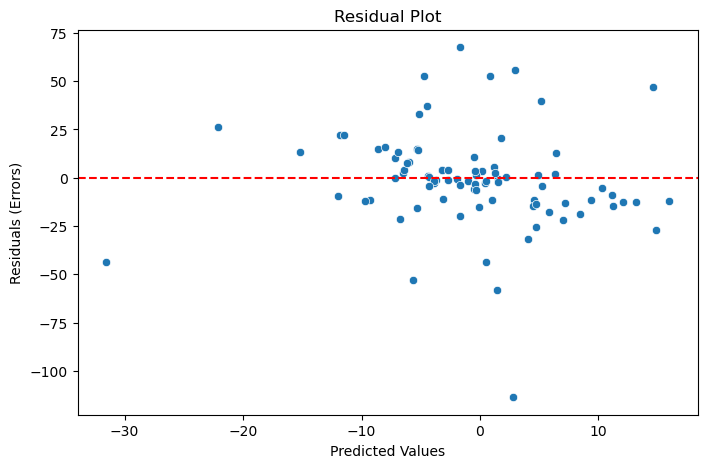

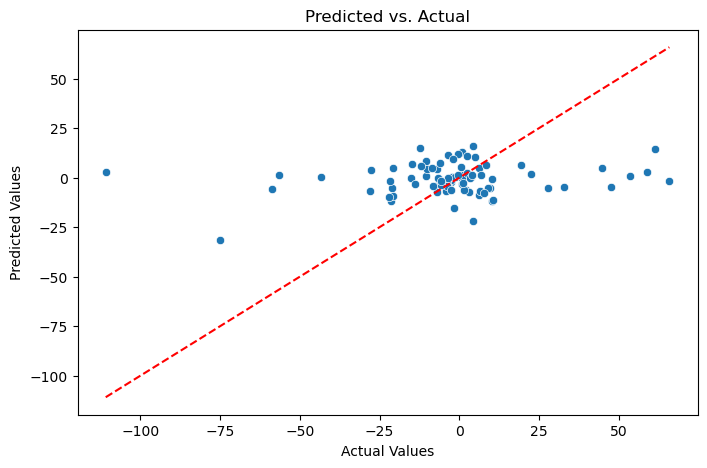


📊 Model Performance:
Mean Squared Error (MSE): 624.2095
R-squared: 0.0183

🌟 Feature Importances (Random Forest):
Area: 0.1580
Perimeter: 0.1189
Extent: 0.1477
Solidity: 0.1328
Compactness: 0.0918
Elongation: 0.1214
Circularity: 0.1064
Convexity: 0.1230


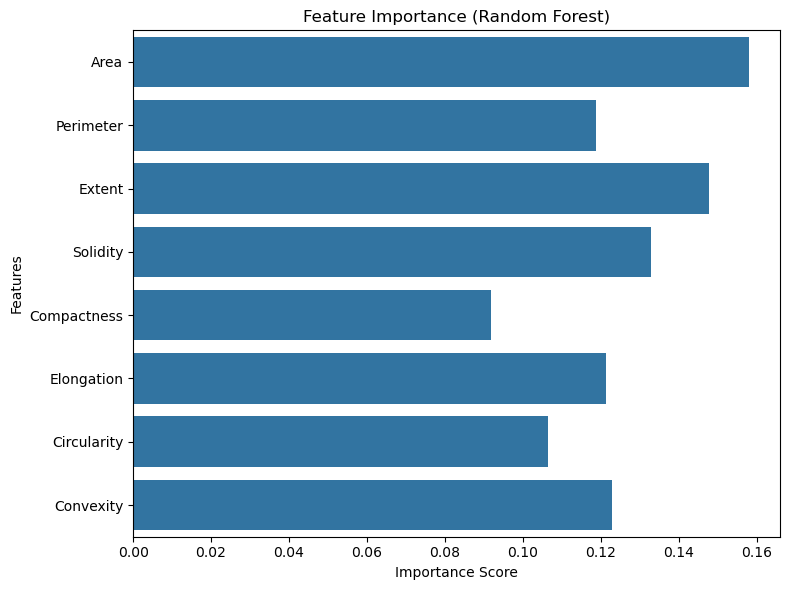

In [9]:



def run_regression_analysis(csv_path, method="ridge", alpha=1.0, n_estimators=100):
    """
    Performs regression analysis on X_Centroid_Velocity with Ridge, Lasso, or Random Forest regression.
    Runs on all data (ignores cell_id).
    """
    df = pd.read_csv(csv_path)

    print("\n🔍 Data Preview:")
    print(df.head())

    print("\n📊 Dataset Summary:")
    print(df.describe())

    print("\n🔍 Checking for NaN values:")
    print(df.isnull().sum())

    features = ["Area", "Perimeter", "Extent", "Solidity", "Compactness","Elongation", "Circularity", "Convexity"]
    target = "X_Centroid_Velocity"
    print(df[df[target].isnull()])

    print("\n📊 Correlation with Target Variable:")
    print(df[features + [target]].corr()[target].sort_values(ascending=False))

    X = df[features]
    y = df[target]

    # print(y)

    if df.shape[0] < 10:
        print(f"\n⚠ Dataset is too small for reliable train-test split ({df.shape[0]} rows). Using entire data for training.")
        X_train, X_test, y_train, y_test = X, X, y, y
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
        print(f"\n📊 Train-Test Split: X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

    if method.lower() == "ridge":
        model = Ridge(alpha=alpha)
        print(f"\n🚀 Applying Ridge Regression with alpha={alpha}")
    elif method.lower() == "lasso":
        model = Lasso(alpha=alpha)
        print(f"\n🚀 Applying Lasso Regression with alpha={alpha}")
    elif method.lower() == "random_forest":
        model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
        print(f"\n🌲 Applying Random Forest Regression with {n_estimators} trees")
    else:
        raise ValueError("Invalid method. Choose 'ridge', 'lasso', or 'random_forest'.")

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    y_mean = np.mean(y_train)
    mse_baseline = mean_squared_error(y_test, np.full_like(y_test, y_mean))
    print(f"\n📊 Baseline Model (Predicting Mean): MSE = {mse_baseline:.4f}")

    residuals = y_test - y_pred

    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals (Errors)")
    plt.title("Residual Plot")
    plt.show()

    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Predicted vs. Actual")
    plt.show()

    print("\n📊 Model Performance:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R-squared: {r2:.4f}")

    if method.lower() == "random_forest":
        print("\n🌟 Feature Importances (Random Forest):")
        importances = model.feature_importances_
        for feat, score in zip(features, importances):
            print(f"{feat}: {score:.4f}")

        plt.figure(figsize=(8, 6))
        sns.barplot(x=importances, y=features)
        plt.title("Feature Importance (Random Forest)")
        plt.xlabel("Importance Score")
        plt.ylabel("Features")
        plt.tight_layout()
        plt.show()

    return model


window_size = 5
output_directory = "/home/MinaHossain/EmbedTrack/Track_New_Result_Shape/Mean"
csv_path = os.path.join(output_directory, f"Cells_Centroid_Velocity_Original_TrueLabel_Mean_{window_size}.csv")

reg_results_rf_all = run_regression_analysis(csv_path, method="random_forest", n_estimators=10000)
# reg_results_rf_all = run_regression_analysis(csv_path, method="lasso", n_estimators=100)

# print("\n🧪 Number of NaN values in target:")
# print(df[target].isnull().sum())



🔍 Data Preview:
   Cell Number  Frame     Area    Perimeter  Solidity    Extent  Circularity  \
0            1     11  26265.0  1853.511760  0.681464  0.470092     0.096072   
1            1     16  28838.0  2041.151370  0.693788  0.527560     0.086981   
2            1     19  15902.0   982.634560  0.799377  0.590275     0.206956   
3            1     20  16554.0  1007.362482  0.820805  0.651476     0.204994   
4            1     21  15973.0  1015.605122  0.806229  0.676449     0.194602   

   Convexity  Elongation  Compactness  Centroid_X  Centroid_Y  \
0   0.972867    0.949683     0.199620  416.328699   65.673476   
1   0.963136    0.957475     0.188757  459.272090   66.781197   
2   0.984825    0.903242     0.285658  311.546092   68.174939   
3   0.978859    0.906398     0.289180  308.513913   67.503740   
4   0.973082    0.912320     0.276314  301.463289   66.831233   

   X_Centroid_Distance  Y_Centroid_Distance  X_Centroid_Velocity  \
0            74.544777             5.897143

/home/MinaHossain/anaconda3/envs/Shp_chc/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)



✅ Best Hyperparameters:
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
✅ Best Cross-Validated R²: 0.0291


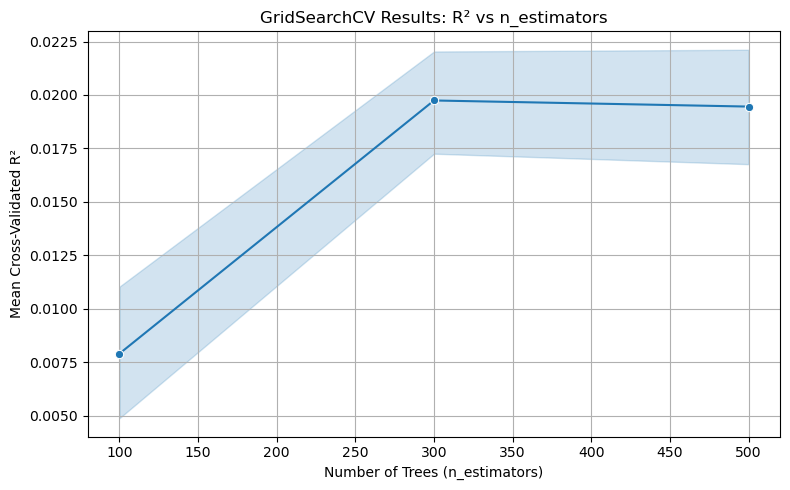

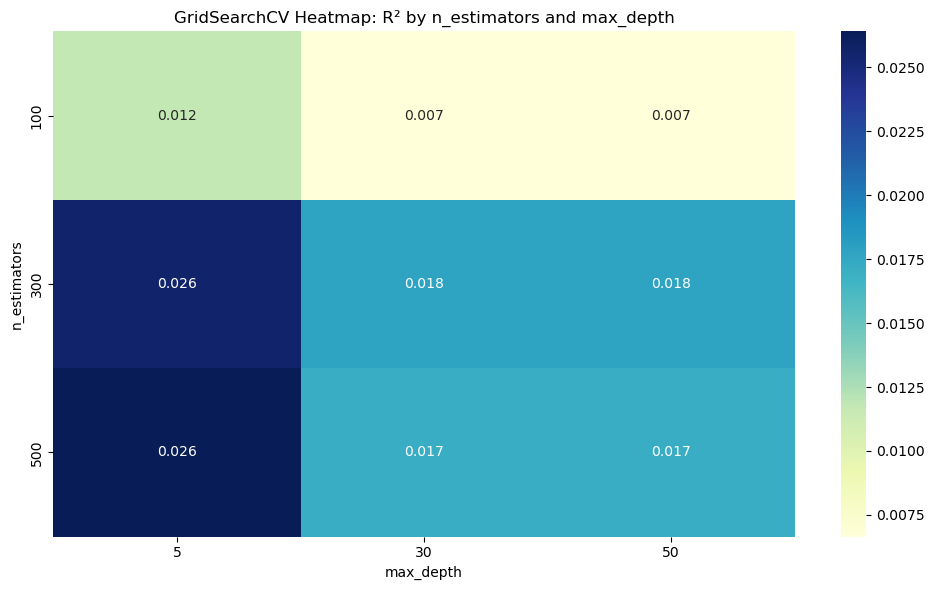


📊 Final Model Performance:
Mean Squared Error (MSE): 674.6187
R-squared: -0.1395


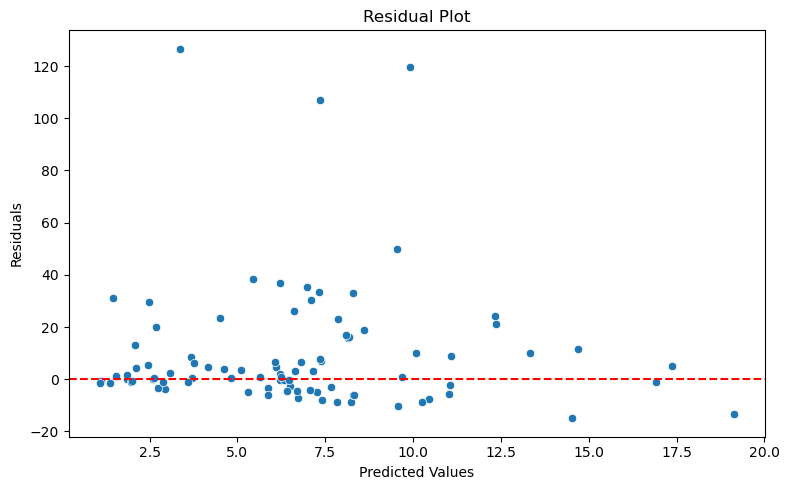

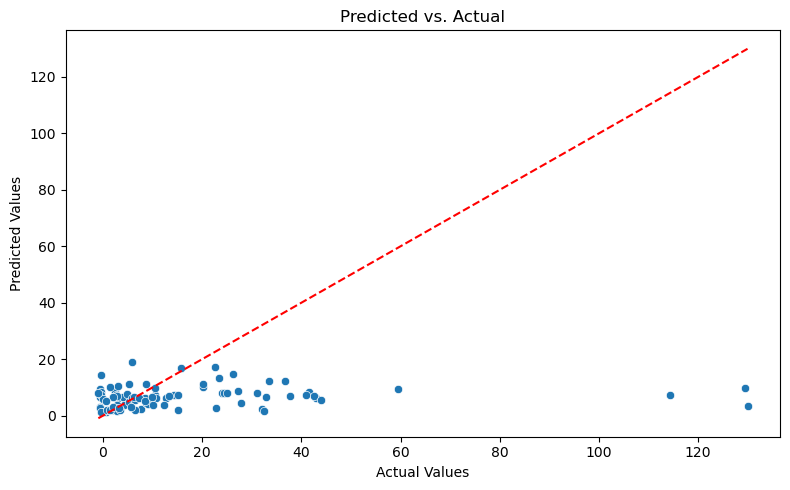

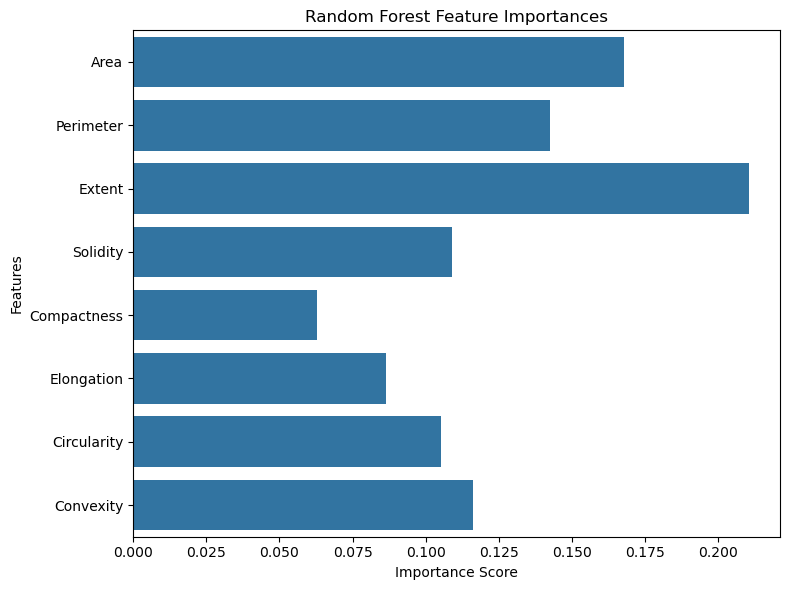

In [34]:


def run_enhanced_rf_regression(csv_path):
    """
    Enhanced Regression Pipeline using Random Forest + GridSearchCV with standardization, target transformation,
    and bulletproof NaN handling.
    """
    df = pd.read_csv(csv_path)

    print("\n🔍 Data Preview:")
    print(df.head())

    print("\n📊 Dataset Summary:")
    print(df.describe())

    print("\n🔍 Checking for NaN values:")
    print(df.isnull().sum())

    features = [
        "Area", "Perimeter", "Extent", "Solidity", "Compactness",
        "Elongation", "Circularity", "Convexity"]
    target = "X_Centroid_Velocity"

    # === Check column existence ===
    missing_cols = [col for col in features + [target] if col not in df.columns]
    if missing_cols:
        raise ValueError(f"Missing columns in the CSV: {missing_cols}")

    # === Drop NaNs only for selected features and target ===
    df = df.dropna(subset=features + [target]).copy()

    print("\n📊 Correlation with Target Variable:")
    print(df[features + [target]].corr()[target].sort_values(ascending=False))

    # === Standardize Features ===
    scaler = StandardScaler()
    X = df[features]
    X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=features)

    # === Target Transformation ===
    y = df[target]
    y = np.log1p(y)  # log1p transformation

    # Final check for any remaining NaNs
    if np.any(np.isnan(y)):
        print("⚠ Still NaNs in y after transformation. Dropping those rows now...")
        non_nan_idx = ~np.isnan(y)
        X_scaled = X_scaled[non_nan_idx]
        y = y[non_nan_idx]

    # === Train-Test Split ===
    if len(y) < 10:
        print("\n⚠ Too few samples for reliable train/test split. Using entire dataset.")
        X_train, X_test, y_train, y_test = X_scaled, X_scaled, y, y
    else:
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=69)
        print(f"\n📊 Train-Test Split: X_train: {X_train.shape}, X_test: {X_test.shape}")

    # Final sanity check
    print(f"\n✅ NaNs in y_train: {np.isnan(y_train).sum()}, y_test: {np.isnan(y_test).sum()}")

    # === Random Forest with GridSearchCV ===
    rf_model = RandomForestRegressor(random_state=42)

    param_grid = {
        "n_estimators": [100, 300, 500],
        "max_depth": [None, 5, 30, 50],
        "min_samples_split": [2, 10],
        "min_samples_leaf": [1, 2]
    }

    grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                               scoring='r2', cv=10, n_jobs=-1, verbose=1)

    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    print("\n✅ Best Hyperparameters:")
    print(grid_search.best_params_)
    print(f"✅ Best Cross-Validated R²: {grid_search.best_score_:.4f}")

    # === GridSearch Results Plot ===
    cv_results = pd.DataFrame(grid_search.cv_results_)

    # Lineplot: R² vs n_estimators
    plt.figure(figsize=(8, 5))
    sns.lineplot(data=cv_results, x="param_n_estimators", y="mean_test_score", marker="o")
    plt.title("GridSearchCV Results: R² vs n_estimators")
    plt.xlabel("Number of Trees (n_estimators)")
    plt.ylabel("Mean Cross-Validated R²")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Heatmap: R² for n_estimators vs max_depth
    pivot = cv_results.pivot_table(index="param_n_estimators", columns="param_max_depth", values="mean_test_score")
    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot, annot=True, fmt=".3f", cmap="YlGnBu")
    plt.title("GridSearchCV Heatmap: R² by n_estimators and max_depth")
    plt.xlabel("max_depth")
    plt.ylabel("n_estimators")
    plt.tight_layout()
    plt.show()

    # === Predict and Evaluate ===
    y_pred_trans = best_model.predict(X_test)
    y_pred = np.expm1(y_pred_trans)  # Reverse log1p
    y_test_orig = np.expm1(y_test)

    mse = mean_squared_error(y_test_orig, y_pred)
    r2 = r2_score(y_test_orig, y_pred)

    print("\n📊 Final Model Performance:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R-squared: {r2:.4f}")

    # === Residuals Plot ===
    residuals = y_test_orig - y_pred
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title("Residual Plot")
    plt.tight_layout()
    plt.show()

    # === Predicted vs Actual Plot ===
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=y_test_orig, y=y_pred)
    plt.plot([y_test_orig.min(), y_test_orig.max()], [y_test_orig.min(), y_test_orig.max()], color='red', linestyle='--')
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Predicted vs. Actual")
    plt.tight_layout()
    plt.show()

    # === Feature Importance Plot ===
    importances = best_model.feature_importances_
    plt.figure(figsize=(8, 6))
    sns.barplot(x=importances, y=features)
    plt.title("Random Forest Feature Importances")
    plt.xlabel("Importance Score")
    plt.ylabel("Features")
    plt.tight_layout()
    plt.show()

    return best_model




# window_size = 5
# frame_num = 30
# output_directory = "/home/MinaHossain/EmbedTrack/PCA_t-SNE_PHATE/"
# csv_path = os.path.join(output_directory, f"Cells_Centroid_Velocity_MA_{window_size}-{frame_num}.csv")


window_size = 5
output_directory = "/home/MinaHossain/EmbedTrack/Track_New_Result_Shape/Mean"
csv_path = os.path.join(output_directory, f"Cells_Centroid_Velocity_Original_TrueLabel_Mean_{window_size}.csv")

reg_model = run_enhanced_rf_regression(csv_path)



In [39]:
# import os
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# from sklearn.linear_model import Ridge, Lasso, ElasticNet
# from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.inspection import permutation_importance

# from xgboost import XGBRegressor

def run_all_regressions_log_target(csv_path, alpha=1.0, l1_ratio=0.5, n_estimators=100):
    """
    Applies log1p transformation to a shifted target variable, trains regression models, and returns performance summary.
    Models: Ridge, Lasso, ElasticNet, RandomForest, HistGradientBoosting, XGBoost
    """
    df = pd.read_csv(csv_path)

    features = ["Area", "Perimeter", "Extent", "Solidity", "Compactness",
                "Elongation", "Circularity", "Convexity"]
    target = "X_Centroid_Velocity"

    df.dropna(subset=features + [target], inplace=True)

    # Shift target to make it positive
    y_min = df[target].min()
    shift_val = -y_min + 1
    df["target_log"] = np.log1p(df[target] + shift_val)

    X = df[features]
    y_log = df["target_log"]

    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Train-test split
    if df.shape[0] < 10:
        print(f"\n⚠ Dataset too small for split. Using full data.")
        X_train, X_test, y_train, y_test = X_scaled, X_scaled, y_log, y_log
    else:
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_log, test_size=0.1, random_state=42)

    models = {
        "Ridge": Ridge(alpha=alpha),
        "Lasso": Lasso(alpha=alpha),
        "Elastic Net": ElasticNet(alpha=alpha, l1_ratio=l1_ratio),
        "Random Forest": RandomForestRegressor(n_estimators=n_estimators, random_state=42),
        "HistGradientBoosting": HistGradientBoostingRegressor(random_state=42),
        "XGBoost": XGBRegressor(n_estimators=n_estimators, learning_rate=0.1, random_state=42)
    }

    results = []

    for name, model in models.items():
        print(f"\n🔍 Training: {name}")
        model.fit(X_train, y_train)
        y_pred_log = model.predict(X_test)

        # Inverse transform the predictions and ground truth to original scale
        y_pred = np.expm1(y_pred_log) - shift_val
        y_true = np.expm1(y_test) - shift_val

        mse = mean_squared_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)

        print(f"📊 {name} - MSE: {mse:.4f}, R²: {r2:.4f}")

        results.append({
            "Model": name,
            "MSE": mse,
            "R2": r2
        })

        # Residual Plot
        residuals = y_true - y_pred
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=y_pred, y=residuals)
        plt.axhline(0, color="red", linestyle="--")
        plt.title(f"{name} Residuals (Log Target)")
        plt.xlabel("Predicted")
        plt.ylabel("Residuals")
        plt.tight_layout()
        plt.close()
        # plt.show()
        

        # Actual vs Predicted
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=y_true, y=y_pred)
        plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
        plt.title(f"{name}: Actual vs Predicted (Original Scale)")
        plt.xlabel("Actual")
        plt.ylabel("Predicted")
        plt.tight_layout()
        plt.close()
        # plt.show()
        

        # Feature importances for tree models
        if name in ["Random Forest", "HistGradientBoosting", "XGBoost"]:
            print(f"\n🌲 Calculating Feature Importances: {name}")
            result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
            importances = result.importances_mean

            for feat, score in zip(features, importances):
                print(f"{feat}: {score:.4f}")

            plt.figure(figsize=(6, 4))
            sns.barplot(x=importances, y=features)
            plt.title(f"{name} Feature Importance (Permutation)")
            plt.tight_layout()
            # plt.show()
            plt.close()

    print("\n📋 Summary of All Model Performances (Log-Transformed Target):")
    summary_df = pd.DataFrame(results)
    print(summary_df)

    return summary_df



window_size = 5  # Change if needed

# output_directory = "/home/MinaHossain/EmbedTrack/Cell_Frame-Video/Track_New_Output"
# csv_path = os.path.join(output_directory, f"Cells_Centroid_Velocity_TrueLabel_MA_Median_{window_size}.csv")


output_directory = "/home/MinaHossain/EmbedTrack/Track_New_Result_Shape/Mean"
csv_path = os.path.join(output_directory, f"Cells_Centroid_Velocity_Original_TrueLabel_Mean_{window_size}.csv")


# reg_results_rf_all = run_regression_analysis(csv_path, method="random_forest", n_estimators=100)
# reg_results_rf_all = run_regression_analysis(csv_path, method="lasso", n_estimators=100)
# reg_results_rf_all = run_regression_analysis(csv_path, method="ridge", n_estimators=100)
summary_log_target = run_all_regressions_log_target(csv_path, alpha=0.5, l1_ratio=0.7, n_estimators=100)

# print("\n⚠️ Rows with NaN in target variable (X_Centroid_Velocity_MA):")
# nan_rows = df[df["X_Centroid_Velocity_MA"].isnull()]
# print(nan_rows)
# print(f"\nTotal NaN rows: {len(nan_rows)}")



🔍 Training: Ridge
📊 Ridge - MSE: 600.8776, R²: 0.0550

🔍 Training: Lasso
📊 Lasso - MSE: 646.8284, R²: -0.0172

🔍 Training: Elastic Net
📊 Elastic Net - MSE: 646.8284, R²: -0.0172

🔍 Training: Random Forest
📊 Random Forest - MSE: 625.2430, R²: 0.0167

🌲 Calculating Feature Importances: Random Forest
Area: 0.2013
Perimeter: 0.0512
Extent: 0.2152
Solidity: 0.1996
Compactness: 0.0740
Elongation: 0.0876
Circularity: 0.0222
Convexity: -0.0169

🔍 Training: HistGradientBoosting
📊 HistGradientBoosting - MSE: 791.1197, R²: -0.2442

🌲 Calculating Feature Importances: HistGradientBoosting
Area: 0.2125
Perimeter: -0.0060
Extent: 0.1059
Solidity: 0.2057
Compactness: -0.0618
Elongation: 0.2180
Circularity: 0.0205
Convexity: -0.0422

🔍 Training: XGBoost
📊 XGBoost - MSE: 686.6227, R²: -0.0798

🌲 Calculating Feature Importances: XGBoost
Area: 0.3882
Perimeter: 0.1729
Extent: 0.3052
Solidity: 0.7063
Compactness: 0.1241
Elongation: 0.0589
Circularity: 0.0491
Convexity: -0.0019

📋 Summary of All Model Perf

In [43]:

from sklearn.model_selection import cross_val_score
import numpy as np

def forward_selection(X, y, model, cv=5):
    remaining = list(X.columns)
    selected = []
    best_score = -np.inf

    while remaining:
        scores = []
        for feature in remaining:
            current_features = selected + [feature]
            score = cross_val_score(model, X[current_features], y, cv=cv, scoring='r2').mean()
            scores.append((score, feature))

        scores.sort(reverse=True)
        if scores[0][0] > best_score:
            best_score = scores[0][0]
            selected.append(scores[0][1])
            remaining.remove(scores[0][1])
        else:
            break

    return selected


def backward_elimination(X, y, model, cv=5):
    selected = list(X.columns)
    best_score = cross_val_score(model, X[selected], y, cv=cv, scoring='r2').mean()

    while len(selected) > 1:
        scores = []
        for feature in selected:
            current_features = [f for f in selected if f != feature]
            score = cross_val_score(model, X[current_features], y, cv=cv, scoring='r2').mean()
            scores.append((score, feature))

        scores.sort(reverse=True)
        if scores[0][0] > best_score:
            best_score = scores[0][0]
            selected.remove(scores[0][1])
        else:
            break

    return selected


def evaluate_model_cv(X, y, model, selected_features=None, cv=5, log_target=False):
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import make_scorer, mean_squared_error

    if selected_features is not None:
        X = X[selected_features]

    r2 = cross_val_score(model, X, y, cv=cv, scoring='r2').mean()
    neg_mse = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error').mean()
    mse = -neg_mse

    return r2, mse




def run_comparative_feature_selection(csv_path, log_transform=True, cv=5):
    """
    Compare Forward and Backward selection across linear models and evaluate all models including tree-based ones.
    Returns a summary DataFrame.
    """
    from sklearn.linear_model import ElasticNet, Ridge, Lasso, LinearRegression
    from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
    from xgboost import XGBRegressor

    df = pd.read_csv(csv_path)
    features = ["Area", "Perimeter", "Extent", "Solidity", "Compactness",
                "Elongation", "Circularity", "Convexity"]
    target = "X_Centroid_Velocity"
    df.dropna(subset=features + [target], inplace=True)
    X = df[features]
    y = df[target]

    shift_val = -y.min() + 1 if log_transform else 0
    y_trans = np.log1p(y + shift_val) if log_transform else y
    scaler = StandardScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=features)

    linear_models = {
        "ElasticNet": ElasticNet(alpha=0.5, l1_ratio=0.7),
        "Ridge": Ridge(alpha=1.0),
        "Lasso": Lasso(alpha=0.5),
        "OLS": LinearRegression()
    }

    tree_models = {
        "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
        "HistGradientBoosting": HistGradientBoostingRegressor(random_state=42),
        "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    }

    summary = []

    # Linear models with feature selection
    for name, model in linear_models.items():
        selected_fwd = forward_selection(X_scaled, y_trans, model, cv=cv)
        r2_fwd, mse_fwd = evaluate_model_cv(X_scaled, y_trans, model, selected_fwd, cv=cv, log_target=False)
        summary.append({
            "Model": name,
            "Method": "Forward",
            "Selected Features": selected_fwd,
            "R2": r2_fwd,
            "MSE": mse_fwd
        })

        selected_bwd = backward_elimination(X_scaled, y_trans, model, cv=cv)
        r2_bwd, mse_bwd = evaluate_model_cv(X_scaled, y_trans, model, selected_bwd, cv=cv, log_target=False)
        summary.append({
            "Model": name,
            "Method": "Backward",
            "Selected Features": selected_bwd,
            "R2": r2_bwd,
            "MSE": mse_bwd
        })

    # Tree-based models (no feature selection)
    for name, model in tree_models.items():
        r2, mse = evaluate_model_cv(X_scaled, y_trans, model, selected_features=None, cv=cv, log_target=False)
        summary.append({
            "Model": name,
            "Method": "All Features",
            "Selected Features": features,
            "R2": r2,
            "MSE": mse
        })

    return pd.DataFrame(summary)


csv_path = "/home/MinaHossain/EmbedTrack/Track_New_Result_Shape/Mean/Cells_Centroid_Velocity_Original_TrueLabel_Mean_5.csv"

summary_df = run_comparative_feature_selection(csv_path)
display(summary_df.sort_values("R2", ascending=False))



,Model,Method,Selected Features,R2,MSE
0,ElasticNet,Forward,[Solidity],-0.009926,0.090827
1,ElasticNet,Backward,"[Area, Perimeter, Extent, Solidity, Compactnes...",-0.009926,0.090827
4,Lasso,Forward,[Solidity],-0.009926,0.090827
5,Lasso,Backward,"[Area, Perimeter, Extent, Solidity, Compactnes...",-0.009926,0.090827
7,OLS,Backward,"[Area, Elongation]",-0.015985,0.090877
3,Ridge,Backward,"[Area, Elongation]",-0.016025,0.090874
2,Ridge,Forward,[Convexity],-0.021702,0.091416
6,OLS,Forward,[Convexity],-0.021723,0.091417
9,HistGradientBoosting,All Features,"[Area, Perimeter, Extent, Solidity, Compactnes...",-7.012786,0.268610
10,XGBoost,All Features,"[Area, Perimeter, Extent, Solidity, Compactnes...",-7.347919,0.312300



🔍 Clustering data into 12 groups...


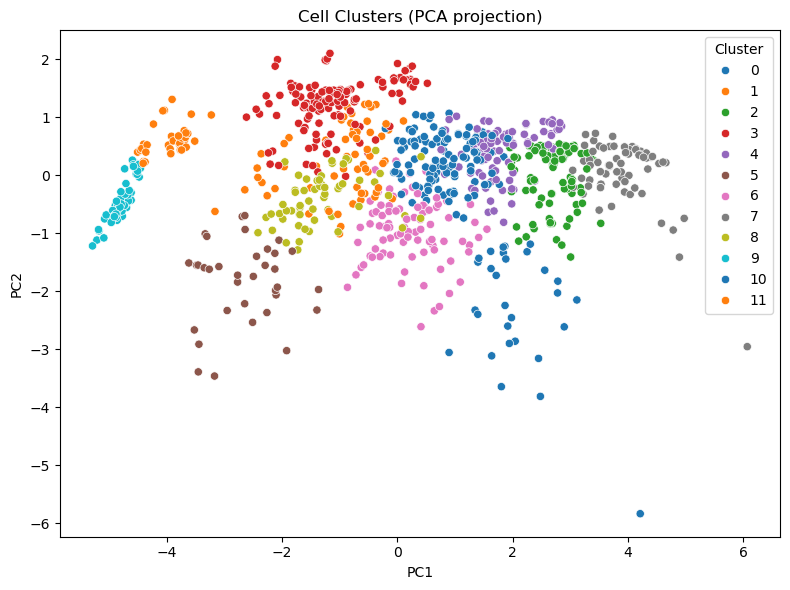


=== Cluster 0 ===
📦 Training Ridge on Cluster 0
📦 Training Lasso on Cluster 0
📦 Training Elastic Net on Cluster 0
📦 Training Random Forest on Cluster 0
📦 Training HistGradientBoosting on Cluster 0
📦 Training XGBoost on Cluster 0

=== Cluster 1 ===
📦 Training Ridge on Cluster 1
📦 Training Lasso on Cluster 1
📦 Training Elastic Net on Cluster 1
📦 Training Random Forest on Cluster 1
📦 Training HistGradientBoosting on Cluster 1
📦 Training XGBoost on Cluster 1

=== Cluster 2 ===
📦 Training Ridge on Cluster 2
📦 Training Lasso on Cluster 2
📦 Training Elastic Net on Cluster 2
📦 Training Random Forest on Cluster 2
📦 Training HistGradientBoosting on Cluster 2
📦 Training XGBoost on Cluster 2

=== Cluster 3 ===
📦 Training Ridge on Cluster 3
📦 Training Lasso on Cluster 3
📦 Training Elastic Net on Cluster 3
📦 Training Random Forest on Cluster 3
📦 Training HistGradientBoosting on Cluster 3
📦 Training XGBoost on Cluster 3

=== Cluster 4 ===
📦 Training Ridge on Cluster 4
📦 Training Lasso on Cluster 4
📦

In [55]:
def clustered_regression_analysis(csv_path, n_clusters=4, alpha=1.0, l1_ratio=0.5, n_estimators=100):
    """
    Clusters data and runs regression models per cluster (on log-transformed target).
    Automatically selects and visualizes the best model per cluster.
    """
    df = pd.read_csv(csv_path)

    features = ["Area", "Perimeter", "Extent", "Solidity", "Compactness", "Elongation", "Circularity", "Convexity"]
    target = "X_Centroid_Velocity"


    df.dropna(subset=features + [target], inplace=True)

    # Standardize features for clustering
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df[features])

    # PCA for visualization
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    # KMeans Clustering
    print(f"\n🔍 Clustering data into {n_clusters} groups...")
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df["Cluster"] = kmeans.fit_predict(X_scaled)

    # Visualize clusters
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df["Cluster"], palette="tab10")
    plt.title("Cell Clusters (PCA projection)")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend(title="Cluster")
    plt.tight_layout()
    plt.show()

    # Log-transform target (with shift)
    y_min = df[target].min()
    shift_val = -y_min + 1
    df["target_log"] = np.log1p(df[target] + shift_val)

    all_results = []
    best_models = []

    for cluster_id in sorted(df["Cluster"].unique()):
        print(f"\n=== Cluster {cluster_id} ===")
        sub_df = df[df["Cluster"] == cluster_id].copy()

        X = sub_df[features]
        y_log = sub_df["target_log"]

        if len(sub_df) < 10:
            print(f"⚠️ Cluster {cluster_id} has too few samples ({len(sub_df)}). Skipping.")
            continue

        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_log, test_size=0.1, random_state=42)

        models = {
            "Ridge": Ridge(alpha=alpha),
            "Lasso": Lasso(alpha=alpha),
            "Elastic Net": ElasticNet(alpha=alpha, l1_ratio=l1_ratio),
            "Random Forest": RandomForestRegressor(n_estimators=n_estimators, random_state=42),
            "HistGradientBoosting": HistGradientBoostingRegressor(random_state=42),
            "XGBoost": XGBRegressor(n_estimators=n_estimators, learning_rate=0.1, random_state=42)
        }

        cluster_results = []
        predictions_by_model = {}

        for name, model in models.items():
            print(f"📦 Training {name} on Cluster {cluster_id}")
            model.fit(X_train, y_train)
            y_pred_log = model.predict(X_test)

            y_pred = np.expm1(y_pred_log) - shift_val
            y_true = np.expm1(y_test) - shift_val

            mse = mean_squared_error(y_true, y_pred)
            r2 = r2_score(y_true, y_pred)

            cluster_results.append({
                "Cluster": cluster_id,
                "Model": name,
                "Samples": len(sub_df),
                "MSE": mse,
                "R2": r2
            })

            predictions_by_model[name] = {
                "y_true": y_true,
                "y_pred": y_pred,
                "X_test": X_test,
                "y_test": y_test,
                "model": model
            }

        all_results.extend(cluster_results)

        best = max(cluster_results, key=lambda x: x["R2"])
        best_model_name = best["Model"]
        best_models.append({
            "Cluster": best["Cluster"],
            "Best Model": best_model_name,
            "Best R2": best["R2"],
            "MSE": best["MSE"],
            "Samples": best["Samples"]
        })

        # === Plotting for best model ===
        y_true = predictions_by_model[best_model_name]["y_true"]
        y_pred = predictions_by_model[best_model_name]["y_pred"]
        model = predictions_by_model[best_model_name]["model"]
        X_test = predictions_by_model[best_model_name]["X_test"]
        y_test = predictions_by_model[best_model_name]["y_test"]

        # Residual Plot
        residuals = y_true - y_pred
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=y_pred, y=residuals)
        plt.axhline(0, color="red", linestyle="--")
        plt.title(f"Cluster {cluster_id} - {best_model_name} Residuals")
        plt.xlabel("Predicted")
        plt.ylabel("Residuals")
        plt.tight_layout()
        # plt.show()
        plt.close()

        # Actual vs Predicted
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=y_true, y=y_pred)
        plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
        plt.title(f"Cluster {cluster_id} - {best_model_name}: Actual vs Predicted")
        plt.xlabel("Actual")
        plt.ylabel("Predicted")
        plt.tight_layout()
        # plt.show()
        plt.close()

        # Feature importances (fixed to avoid multiprocessing issue)
        if best_model_name in ["Random Forest", "HistGradientBoosting", "XGBoost"]:
            print(f"\n🌲 Cluster {cluster_id}: Feature Importances for {best_model_name}")
            result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=1)
            importances = result.importances_mean

            for feat, score in zip(features, importances):
                print(f"{feat}: {score:.4f}")

            plt.figure(figsize=(6, 4))
            sns.barplot(x=importances, y=features)
            plt.title(f"Cluster {cluster_id} - {best_model_name} Feature Importance")
            plt.tight_layout()
            # plt.show()
            plt.close()

    result_df = pd.DataFrame(all_results)
    best_df = pd.DataFrame(best_models)

    print("\n📋 Full Model Performance by Cluster:")
    print(result_df.sort_values(["Cluster", "R2"], ascending=[True, False]))

    print("\n🏆 Best Model per Cluster:")
    print(best_df)

    return result_df, best_df




window_size = 5  # Change if needed

# output_directory = "/home/MinaHossain/EmbedTrack/Cell_Frame-Video/Track_New_Output"
# csv_path = os.path.join(output_directory, f"Cells_Centroid_Velocity_TrueLabel_MA_Median_{window_size}.csv")


output_directory = "/home/MinaHossain/EmbedTrack/Track_New_Result_Shape/Mean"
csv_path = os.path.join(output_directory, f"Cells_Centroid_Velocity_Original_TrueLabel_Mean_{window_size}.csv")



all_models_df, best_models_df = clustered_regression_analysis( csv_path, n_clusters=12, alpha=0.5, l1_ratio=0.7, n_estimators=100)



In [62]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance

from xgboost import XGBRegressor


def regression_per_cell(csv_path, alpha=1.0, l1_ratio=0.5, n_estimators=100, min_samples=40):
    """
    Runs regression analysis per cell ('Cell Number'), applies log1p to the shifted target,
    and visualizes best model performance for each cell with sufficient data.
    """
    df = pd.read_csv(csv_path)
  
    features = ["Area", "Perimeter", "Extent", "Solidity", "Compactness", "Elongation", "Circularity", "Convexity"]
    target = "X_Centroid_Velocity"

    cell_col = "Cell Number"

    df.dropna(subset=features + [target, cell_col], inplace=True)

    # Shift and log-transform target
    y_min = df[target].min()
    shift_val = -y_min + 1
    df["target_log"] = np.log1p(df[target] + shift_val)

    all_results = []
    best_models = []

    for cell_id in sorted(df[cell_col].unique()):
        sub_df = df[df[cell_col] == cell_id].copy()

        if len(sub_df) < min_samples:
            print(f"⚠️ Skipping Cell {cell_id}: too few samples ({len(sub_df)})")
            continue

        print(f"\n🔬 Analyzing Cell {cell_id} with {len(sub_df)} samples...")

        X = sub_df[features]
        y_log = sub_df["target_log"]

        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_log, test_size=0.20, random_state=42)

        models = {
            "Ridge": Ridge(alpha=alpha),
            "Lasso": Lasso(alpha=alpha),
            "Elastic Net": ElasticNet(alpha=alpha, l1_ratio=l1_ratio),
            "Random Forest": RandomForestRegressor(n_estimators=n_estimators, random_state=42),
            "HistGradientBoosting": HistGradientBoostingRegressor(random_state=42),
            "XGBoost": XGBRegressor(n_estimators=n_estimators, learning_rate=0.1, random_state=42)
        }

        cell_results = []
        predictions_by_model = {}

        for name, model in models.items():
            model.fit(X_train, y_train)
            y_pred_log = model.predict(X_test)

            # Inverse log shift
            y_pred = np.expm1(y_pred_log) - shift_val
            y_true = np.expm1(y_test) - shift_val

            mse = mean_squared_error(y_true, y_pred)
            r2 = r2_score(y_true, y_pred)

            cell_results.append({
                "Cell ID": cell_id,
                "Model": name,
                "Samples": len(sub_df),
                "MSE": mse,
                "R2": r2
            })

            predictions_by_model[name] = {
                "y_true": y_true,
                "y_pred": y_pred,
                "X_test": X_test,
                "y_test": y_test,
                "model": model
            }

        all_results.extend(cell_results)

        # Pick best model for this cell
        best = max(cell_results, key=lambda x: x["R2"])
        best_model_name = best["Model"]
        best_models.append({
            "Cell ID": best["Cell ID"],
            "Best Model": best_model_name,
            "Best R2": best["R2"],
            "MSE": best["MSE"],
            "Samples": best["Samples"]
        })

        # === Plotting for best model ===
        y_true = predictions_by_model[best_model_name]["y_true"]
        y_pred = predictions_by_model[best_model_name]["y_pred"]
        model = predictions_by_model[best_model_name]["model"]
        X_test = predictions_by_model[best_model_name]["X_test"]
        y_test = predictions_by_model[best_model_name]["y_test"]

        # Residual Plot
        residuals = y_true - y_pred
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=y_pred, y=residuals)
        plt.axhline(0, color="red", linestyle="--")
        plt.title(f"Cell {cell_id} - {best_model_name} Residuals")
        plt.xlabel("Predicted")
        plt.ylabel("Residuals")
        plt.tight_layout()
        plt.close()
        # plt.show()

        # Actual vs Predicted
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=y_true, y=y_pred)
        plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
        plt.title(f"Cell {cell_id} - {best_model_name}: Actual vs Predicted")
        plt.xlabel("Actual")
        plt.ylabel("Predicted")
        plt.tight_layout()
        plt.close()
        # plt.show()

        # Feature importances (tree-based only)
        if best_model_name in ["Random Forest", "HistGradientBoosting", "XGBoost"]:
            print(f"\n🌲 Cell {cell_id}: Feature Importances for {best_model_name}")
            try:
                result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
            except Exception as e:
                print(f"⚠️ Falling back to n_jobs=1 due to: {e}")
                result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=1)

            importances = result.importances_mean

            for feat, score in zip(features, importances):
                print(f"{feat}: {score:.4f}")

            plt.figure(figsize=(6, 4))
            sns.barplot(x=importances, y=features)
            plt.title(f"Cell {cell_id} - {best_model_name} Feature Importance")
            plt.tight_layout()
            plt.close()
            # plt.show()

    # Final output
    result_df = pd.DataFrame(all_results)
    best_df = pd.DataFrame(best_models)

    print("\n📋 Full Model Performance by Cell:")
    print(result_df.sort_values(["Cell ID", "R2"], ascending=[True, False]))

    print("\n🏆 Best Model per Cell:")
    print(best_df)

    return result_df, best_df


window_size = 5  # Change if needed

output_directory = "/home/MinaHossain/EmbedTrack/Track_New_Result_Shape/Mean"
csv_path = os.path.join(output_directory, f"Cells_Centroid_Velocity_Original_TrueLabel_Mean_{window_size}.csv")


# output_directory = "/home/MinaHossain/EmbedTrack/Cell_Frame-Video/Reg_Output"
# csv_path = os.path.join(output_directory, f"Cells_Centroid_Velocity_TrueLabel_MA_Mean_{window_size}.csv")
all_df, best_df = regression_per_cell(csv_path, alpha=0.5, l1_ratio=0.7, n_estimators=100, min_samples=40)


⚠️ Skipping Cell 1: too few samples (23)

🔬 Analyzing Cell 2 with 80 samples...

🔬 Analyzing Cell 3 with 99 samples...

🌲 Cell 3: Feature Importances for Random Forest
Area: 0.1897
Perimeter: 0.2365
Extent: 0.2088
Solidity: -0.0217
Compactness: -0.0153
Elongation: 0.0361
Circularity: 0.0159
Convexity: -0.0205

🔬 Analyzing Cell 4 with 99 samples...

🌲 Cell 4: Feature Importances for Random Forest
Area: -0.0172
Perimeter: 0.0648
Extent: 0.0016
Solidity: -0.0023
Compactness: 0.4231
Elongation: 0.3664
Circularity: 0.0071
Convexity: 0.0304

🔬 Analyzing Cell 6 with 99 samples...
⚠️ Skipping Cell 7: too few samples (15)

🔬 Analyzing Cell 8 with 99 samples...

🌲 Cell 8: Feature Importances for XGBoost
Area: 0.2181
Perimeter: 0.1643
Extent: 0.3684
Solidity: 0.9836
Compactness: 0.1294
Elongation: 0.1341
Circularity: 0.1689
Convexity: -0.0319

🔬 Analyzing Cell 9 with 99 samples...

🌲 Cell 9: Feature Importances for XGBoost
Area: 0.3112
Perimeter: 0.0301
Extent: 0.0442
Solidity: 0.0804
Compactness

# Reg on MA of Shape features


🔍 Data Preview:
   Cell Number  Frame     Area    Perimeter  Solidity    Extent  Circularity  \
0            1     11  26265.0  1853.511760  0.681464  0.470092     0.096072   
1            1     16  28838.0  2041.151370  0.693788  0.527560     0.086981   
2            1     19  15902.0   982.634560  0.799377  0.590275     0.206956   
3            1     20  16554.0  1007.362482  0.820805  0.651476     0.204994   
4            1     21  15973.0  1015.605122  0.806229  0.676449     0.194602   

   Convexity  Elongation  Compactness  ...  Compactness_MA  Elongation_MA  \
0   0.972867    0.949683     0.199620  ...        0.199620       0.949683   
1   0.963136    0.957475     0.188757  ...        0.194188       0.953579   
2   0.984825    0.903242     0.285658  ...        0.224678       0.936800   
3   0.978859    0.906398     0.289180  ...        0.240804       0.929199   
4   0.973082    0.912320     0.276314  ...        0.247906       0.925824   

   Circularity_MA  Convexity_MA  Centro

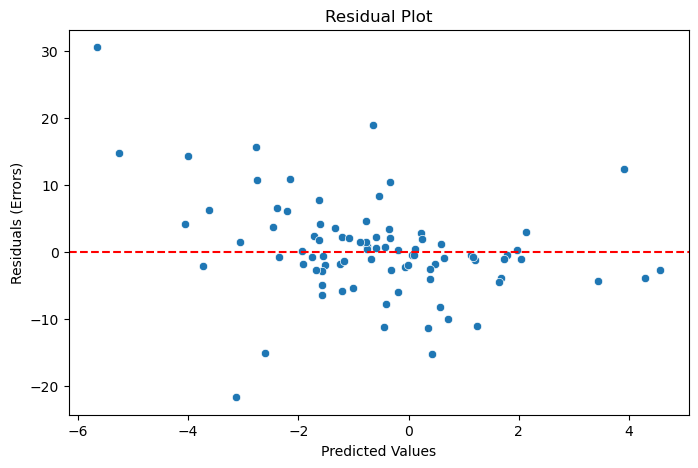

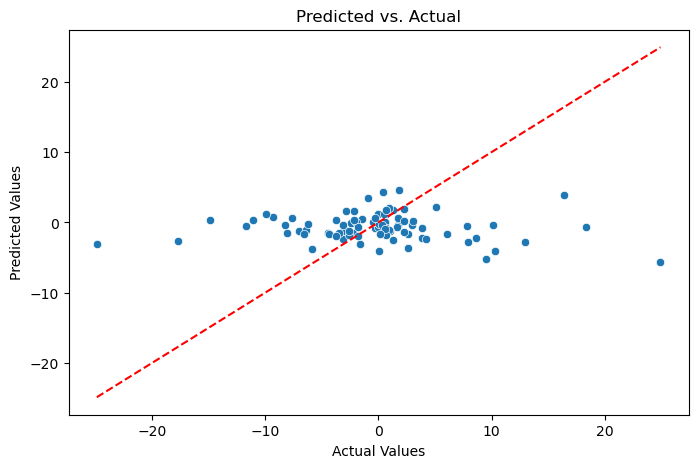


📊 Model Performance:
Mean Squared Error (MSE): 55.0320
R-squared: -0.1221

🌟 Feature Importances (Random Forest):
Area_MA: 0.1422
Perimeter_MA: 0.1312
Extent_MA: 0.1207
Solidity_MA: 0.1203
Compactness_MA: 0.1221
Elongation_MA: 0.1149
Circularity_MA: 0.1168
Convexity_MA: 0.1318


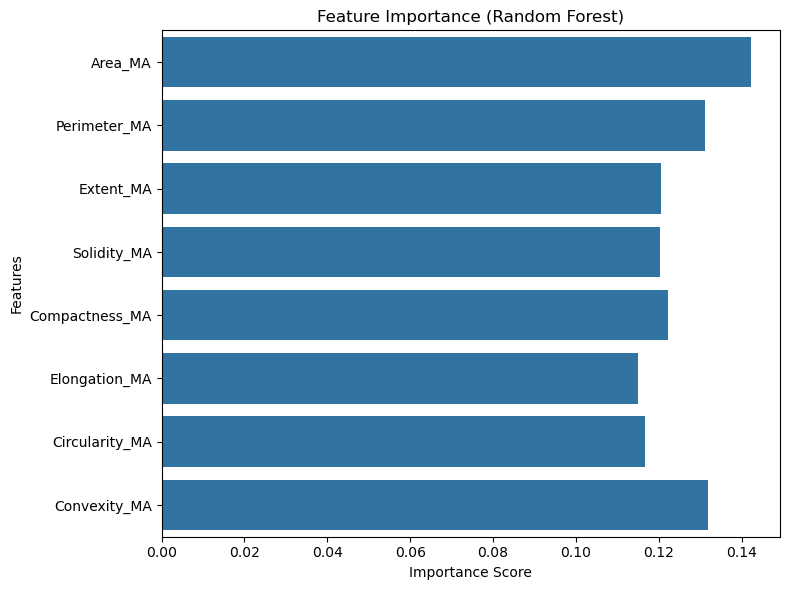

In [22]:


def run_regression_analysis(csv_path, method="ridge", alpha=1.0, n_estimators=100):
    """
    Performs regression analysis on X_Centroid_Velocity with Ridge, Lasso, or Random Forest regression.
    Runs on all data (ignores cell_id).
    """
    df = pd.read_csv(csv_path)

    print("\n🔍 Data Preview:")
    print(df.head())

    print("\n📊 Dataset Summary:")
    print(df.describe())

    print("\n🔍 Checking for NaN values:")
    print(df.isnull().sum())

    features = ["Area_MA", "Perimeter_MA", "Extent_MA", "Solidity_MA", "Compactness_MA",
                "Elongation_MA", "Circularity_MA", "Convexity_MA"]
    target = "X_Centroid_Velocity_MA"
    print(df[df[target].isnull()])

    print("\n📊 Correlation with Target Variable:")
    print(df[features + [target]].corr()[target].sort_values(ascending=False))

    X = df[features]
    y = df[target]
    # y = np.log1p(df[target])


    # print(y)

    if df.shape[0] < 10:
        print(f"\n⚠ Dataset is too small for reliable train-test split ({df.shape[0]} rows). Using entire data for training.")
        X_train, X_test, y_train, y_test = X, X, y, y
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
        print(f"\n📊 Train-Test Split: X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

    if method.lower() == "ridge":
        model = Ridge(alpha=alpha)
        print(f"\n🚀 Applying Ridge Regression with alpha={alpha}")
    elif method.lower() == "lasso":
        model = Lasso(alpha=alpha)
        print(f"\n🚀 Applying Lasso Regression with alpha={alpha}")
    elif method.lower() == "random_forest":
        # model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
        model = RandomForestRegressor( n_estimators=500, max_depth=50, min_samples_leaf=5, max_features='sqrt', random_state=444, n_jobs=-1)
        print(f"\n🌲 Applying Random Forest Regression with {n_estimators} trees")
    else:
        raise ValueError("Invalid method. Choose 'ridge', 'lasso', or 'random_forest'.")

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    y_mean = np.mean(y_train)
    mse_baseline = mean_squared_error(y_test, np.full_like(y_test, y_mean))
    print(f"\n📊 Baseline Model (Predicting Mean): MSE = {mse_baseline:.4f}")

    residuals = y_test - y_pred

    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals (Errors)")
    plt.title("Residual Plot")
    plt.show()

    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Predicted vs. Actual")
    plt.show()

    print("\n📊 Model Performance:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R-squared: {r2:.4f}")

    if method.lower() == "random_forest":
        print("\n🌟 Feature Importances (Random Forest):")
        importances = model.feature_importances_
        for feat, score in zip(features, importances):
            print(f"{feat}: {score:.4f}")

        plt.figure(figsize=(8, 6))
        sns.barplot(x=importances, y=features)
        plt.title("Feature Importance (Random Forest)")
        plt.xlabel("Importance Score")
        plt.ylabel("Features")
        plt.tight_layout()
        plt.show()

    return model


window_size = 5
output_directory = "/home/MinaHossain/EmbedTrack/Track_New_Result_Shape/Mean"
csv_path = os.path.join(output_directory, f"Cells_Centroid_Velocity_TrueLabel_MA_Mean_{window_size}.csv")

reg_results_rf_all = run_regression_analysis(csv_path, method="random_forest", n_estimators=200)
# reg_results_rf_all = run_regression_analysis(csv_path, method="ridge", n_estimators=100)

# print("\n🧪 Number of NaN values in target:")
# print(df[target].isnull().sum())



🔍 Data Preview:
   Cell Number  Frame     Area    Perimeter  Solidity    Extent  Circularity  \
0            1     11  26265.0  1853.511760  0.681464  0.470092     0.096072   
1            1     16  28838.0  2041.151370  0.693788  0.527560     0.086981   
2            1     19  15902.0   982.634560  0.799377  0.590275     0.206956   
3            1     20  16554.0  1007.362482  0.820805  0.651476     0.204994   
4            1     21  15973.0  1015.605122  0.806229  0.676449     0.194602   

   Convexity  Elongation  Compactness  ...  Compactness_MA  Elongation_MA  \
0   0.972867    0.949683     0.199620  ...        0.199620       0.949683   
1   0.963136    0.957475     0.188757  ...        0.194188       0.953579   
2   0.984825    0.903242     0.285658  ...        0.224678       0.936800   
3   0.978859    0.906398     0.289180  ...        0.240804       0.929199   
4   0.973082    0.912320     0.276314  ...        0.247906       0.925824   

   Circularity_MA  Convexity_MA  Centro

/home/MinaHossain/anaconda3/envs/Shp_chc/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)



✅ Best Hyperparameters:
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 500}
✅ Best Cross-Validated R²: 0.0523


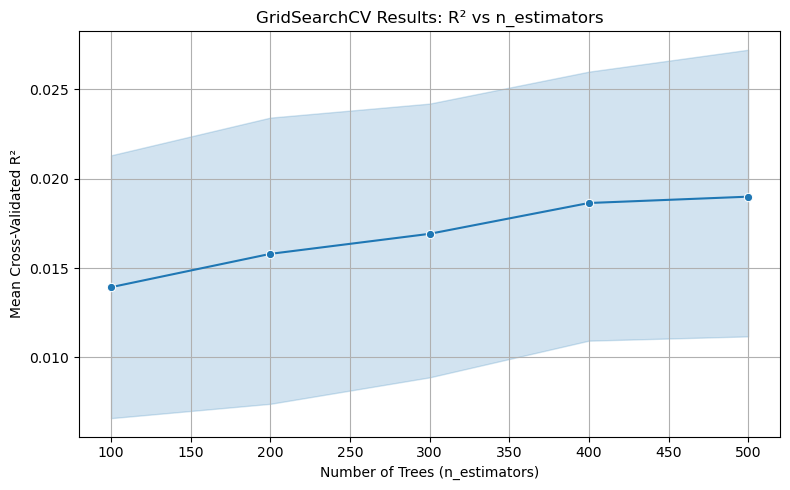

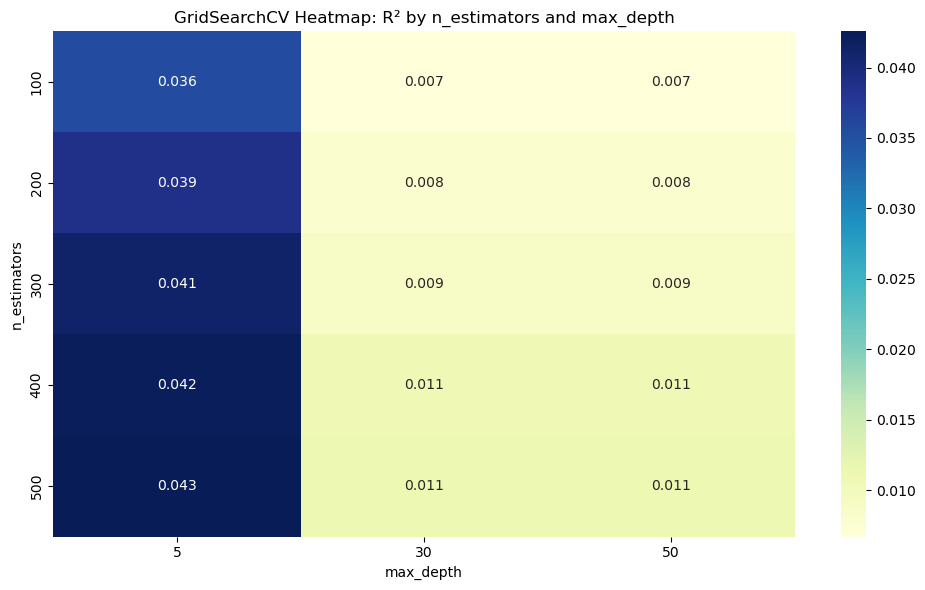


📊 Final Model Performance:
Mean Squared Error (MSE): 13.1328
R-squared: -0.0599


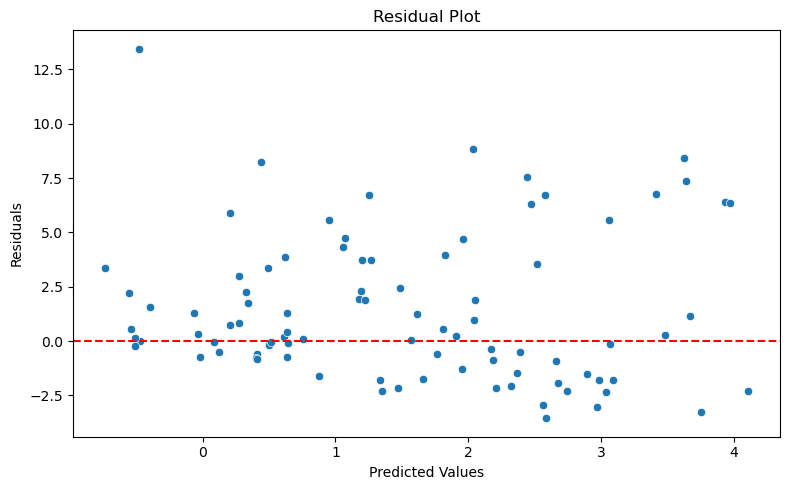

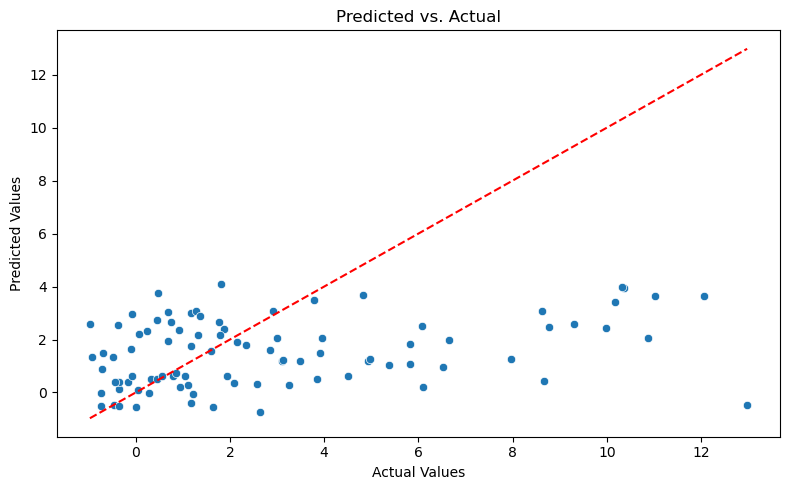

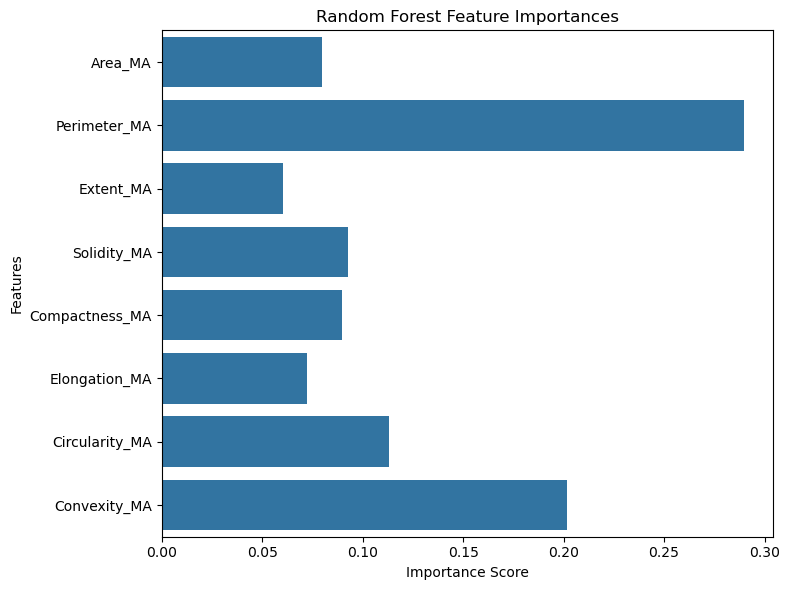

In [32]:

def run_enhanced_rf_regression(csv_path):
    """
    Enhanced Regression Pipeline using Random Forest + GridSearchCV with standardization, target transformation,
    and bulletproof NaN handling.
    """
    df = pd.read_csv(csv_path)

    print("\n🔍 Data Preview:")
    print(df.head())

    print("\n📊 Dataset Summary:")
    print(df.describe())

    print("\n🔍 Checking for NaN values:")
    print(df.isnull().sum())

    features = [
        "Area_MA", "Perimeter_MA", "Extent_MA", "Solidity_MA", "Compactness_MA",
        "Elongation_MA", "Circularity_MA", "Convexity_MA"]
    target = "X_Centroid_Velocity_MA"

    # === Check column existence ===
    missing_cols = [col for col in features + [target] if col not in df.columns]
    if missing_cols:
        raise ValueError(f"Missing columns in the CSV: {missing_cols}")

    # === Drop NaNs only for selected features and target ===
    df = df.dropna(subset=features + [target]).copy()

    print("\n📊 Correlation with Target Variable:")
    print(df[features + [target]].corr()[target].sort_values(ascending=False))

    # === Standardize Features ===
    scaler = StandardScaler()
    X = df[features]
    X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=features)

    # === Target Transformation ===
    y = df[target]
    y = np.log1p(y)  # log1p transformation

    # Final check for any remaining NaNs
    if np.any(np.isnan(y)):
        print("⚠ Still NaNs in y after transformation. Dropping those rows now...")
        non_nan_idx = ~np.isnan(y)
        X_scaled = X_scaled[non_nan_idx]
        y = y[non_nan_idx]

    # === Train-Test Split ===
    if len(y) < 10:
        print("\n⚠ Too few samples for reliable train/test split. Using entire dataset.")
        X_train, X_test, y_train, y_test = X_scaled, X_scaled, y, y
    else:
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=69)
        print(f"\n📊 Train-Test Split: X_train: {X_train.shape}, X_test: {X_test.shape}")

    # Final sanity check
    print(f"\n✅ NaNs in y_train: {np.isnan(y_train).sum()}, y_test: {np.isnan(y_test).sum()}")

    # === Random Forest with GridSearchCV ===
    rf_model = RandomForestRegressor(random_state=99)

    param_grid = {
        "n_estimators": [100, 200,300,400, 500],
        "max_depth": [None, 5, 30, 50],
        "min_samples_split": [2, 10,20],
        "min_samples_leaf": [1, 2,5]
    }

    grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                               scoring='r2', cv=20, n_jobs=-1, verbose=1)

    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    print("\n✅ Best Hyperparameters:")
    print(grid_search.best_params_)
    print(f"✅ Best Cross-Validated R²: {grid_search.best_score_:.4f}")

    # === GridSearch Results Plot ===
    cv_results = pd.DataFrame(grid_search.cv_results_)

    # Lineplot: R² vs n_estimators
    plt.figure(figsize=(8, 5))
    sns.lineplot(data=cv_results, x="param_n_estimators", y="mean_test_score", marker="o")
    plt.title("GridSearchCV Results: R² vs n_estimators")
    plt.xlabel("Number of Trees (n_estimators)")
    plt.ylabel("Mean Cross-Validated R²")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Heatmap: R² for n_estimators vs max_depth
    pivot = cv_results.pivot_table(index="param_n_estimators", columns="param_max_depth", values="mean_test_score")
    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot, annot=True, fmt=".3f", cmap="YlGnBu")
    plt.title("GridSearchCV Heatmap: R² by n_estimators and max_depth")
    plt.xlabel("max_depth")
    plt.ylabel("n_estimators")
    plt.tight_layout()
    plt.show()

    # === Predict and Evaluate ===
    y_pred_trans = best_model.predict(X_test)
    y_pred = np.expm1(y_pred_trans)  # Reverse log1p
    y_test_orig = np.expm1(y_test)

    mse = mean_squared_error(y_test_orig, y_pred)
    r2 = r2_score(y_test_orig, y_pred)

    print("\n📊 Final Model Performance:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R-squared: {r2:.4f}")

    # === Residuals Plot ===
    residuals = y_test_orig - y_pred
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title("Residual Plot")
    plt.tight_layout()
    plt.show()

    # === Predicted vs Actual Plot ===
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=y_test_orig, y=y_pred)
    plt.plot([y_test_orig.min(), y_test_orig.max()], [y_test_orig.min(), y_test_orig.max()], color='red', linestyle='--')
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Predicted vs. Actual")
    plt.tight_layout()
    plt.show()

    # === Feature Importance Plot ===
    importances = best_model.feature_importances_
    plt.figure(figsize=(8, 6))
    sns.barplot(x=importances, y=features)
    plt.title("Random Forest Feature Importances")
    plt.xlabel("Importance Score")
    plt.ylabel("Features")
    plt.tight_layout()
    plt.show()

    return best_model




# window_size = 5
# frame_num = 30
# output_directory = "/home/MinaHossain/EmbedTrack/PCA_t-SNE_PHATE/"
# csv_path = os.path.join(output_directory, f"Cells_Centroid_Velocity_MA_{window_size}-{frame_num}.csv")


# window_size = 5
# output_directory = "/home/MinaHossain/EmbedTrack/Cell_Frame-Video/Shape_Measure-Median"
# csv_path = os.path.join(output_directory, f"Cells_Centroid_Velocity_TrueLabel_MA_Median_{window_size}.csv")

# reg_model = run_enhanced_rf_regression(csv_path)




# window_size = 5
# frame_num = 30
# output_directory = "/home/MinaHossain/EmbedTrack/PCA_t-SNE_PHATE/"
# csv_path = os.path.join(output_directory, f"Cells_Centroid_Velocity_MA_{window_size}-{frame_num}.csv")


window_size = 5
output_directory = "/home/MinaHossain/EmbedTrack/Track_New_Result_Shape/Mean"
csv_path = os.path.join(output_directory, f"Cells_Centroid_Velocity_TrueLabel_MA_Mean_{window_size}.csv")

reg_model = run_enhanced_rf_regression(csv_path)



In [38]:
# import os
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# from sklearn.linear_model import Ridge, Lasso, ElasticNet
# from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.inspection import permutation_importance

# from xgboost import XGBRegressor

def run_all_regressions_log_target(csv_path, alpha=1.0, l1_ratio=0.5, n_estimators=100):
    """
    Applies log1p transformation to a shifted target variable, trains regression models, and returns performance summary.
    Models: Ridge, Lasso, ElasticNet, RandomForest, HistGradientBoosting, XGBoost
    """
    df = pd.read_csv(csv_path)

    features = ["Area_MA", "Perimeter_MA", "Extent_MA", "Solidity_MA", "Compactness_MA",
                "Elongation_MA", "Circularity_MA", "Convexity_MA"]
    target = "X_Centroid_Velocity_MA"

    df.dropna(subset=features + [target], inplace=True)

    # Shift target to make it positive
    y_min = df[target].min()
    shift_val = -y_min + 1
    df["target_log"] = np.log1p(df[target] + shift_val)

    X = df[features]
    y_log = df["target_log"]

    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Train-test split
    if df.shape[0] < 10:
        print(f"\n⚠ Dataset too small for split. Using full data.")
        X_train, X_test, y_train, y_test = X_scaled, X_scaled, y_log, y_log
    else:
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_log, test_size=0.1, random_state=42)

    models = {
        "Ridge": Ridge(alpha=alpha),
        "Lasso": Lasso(alpha=alpha),
        "Elastic Net": ElasticNet(alpha=alpha, l1_ratio=l1_ratio),
        "Random Forest": RandomForestRegressor(n_estimators=n_estimators, random_state=42),
        "HistGradientBoosting": HistGradientBoostingRegressor(random_state=42),
        "XGBoost": XGBRegressor(n_estimators=n_estimators, learning_rate=0.1, random_state=42)
    }

    results = []

    for name, model in models.items():
        print(f"\n🔍 Training: {name}")
        model.fit(X_train, y_train)
        y_pred_log = model.predict(X_test)

        # Inverse transform the predictions and ground truth to original scale
        y_pred = np.expm1(y_pred_log) - shift_val
        y_true = np.expm1(y_test) - shift_val

        mse = mean_squared_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)

        print(f"📊 {name} - MSE: {mse:.4f}, R²: {r2:.4f}")

        results.append({
            "Model": name,
            "MSE": mse,
            "R2": r2
        })

        # Residual Plot
        residuals = y_true - y_pred
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=y_pred, y=residuals)
        plt.axhline(0, color="red", linestyle="--")
        plt.title(f"{name} Residuals (Log Target)")
        plt.xlabel("Predicted")
        plt.ylabel("Residuals")
        plt.tight_layout()
        plt.close()
        # plt.show()
        

        # Actual vs Predicted
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=y_true, y=y_pred)
        plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
        plt.title(f"{name}: Actual vs Predicted (Original Scale)")
        plt.xlabel("Actual")
        plt.ylabel("Predicted")
        plt.tight_layout()
        plt.close()
        # plt.show()
        

        # Feature importances for tree models
        if name in ["Random Forest", "HistGradientBoosting", "XGBoost"]:
            print(f"\n🌲 Calculating Feature Importances: {name}")
            result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
            importances = result.importances_mean

            for feat, score in zip(features, importances):
                print(f"{feat}: {score:.4f}")

            plt.figure(figsize=(6, 4))
            sns.barplot(x=importances, y=features)
            plt.title(f"{name} Feature Importance (Permutation)")
            plt.tight_layout()
            # plt.show()
            plt.close()

    print("\n📋 Summary of All Model Performances (Log-Transformed Target):")
    summary_df = pd.DataFrame(results)
    print(summary_df)

    return summary_df



window_size = 5  # Change if needed

# output_directory = "/home/MinaHossain/EmbedTrack/Cell_Frame-Video/Track_New_Output"
# csv_path = os.path.join(output_directory, f"Cells_Centroid_Velocity_TrueLabel_MA_Median_{window_size}.csv")


output_directory = "/home/MinaHossain/EmbedTrack/Track_New_Result_Shape/Mean"
csv_path = os.path.join(output_directory, f"Cells_Centroid_Velocity_TrueLabel_MA_Mean_{window_size}.csv")


# reg_results_rf_all = run_regression_analysis(csv_path, method="random_forest", n_estimators=100)
# reg_results_rf_all = run_regression_analysis(csv_path, method="lasso", n_estimators=100)
# reg_results_rf_all = run_regression_analysis(csv_path, method="ridge", n_estimators=100)
summary_log_target = run_all_regressions_log_target(csv_path, alpha=0.5, l1_ratio=0.7, n_estimators=100)

# print("\n⚠️ Rows with NaN in target variable (X_Centroid_Velocity_MA):")
# nan_rows = df[df["X_Centroid_Velocity_MA"].isnull()]
# print(nan_rows)
# print(f"\nTotal NaN rows: {len(nan_rows)}")



🔍 Training: Ridge
📊 Ridge - MSE: 54.9609, R²: -0.1206

🔍 Training: Lasso
📊 Lasso - MSE: 51.8671, R²: -0.0575

🔍 Training: Elastic Net
📊 Elastic Net - MSE: 51.8671, R²: -0.0575

🔍 Training: Random Forest
📊 Random Forest - MSE: 54.5003, R²: -0.1112

🌲 Calculating Feature Importances: Random Forest
Area_MA: 0.3154
Perimeter_MA: 0.2266
Extent_MA: 0.1220
Solidity_MA: 0.0462
Compactness_MA: 0.0786
Elongation_MA: 0.0257
Circularity_MA: 0.0247
Convexity_MA: 0.0056

🔍 Training: HistGradientBoosting
📊 HistGradientBoosting - MSE: 63.4713, R²: -0.2941

🌲 Calculating Feature Importances: HistGradientBoosting
Area_MA: 0.0336
Perimeter_MA: 0.2344
Extent_MA: 0.0205
Solidity_MA: 0.1821
Compactness_MA: -0.0145
Elongation_MA: -0.0879
Circularity_MA: 0.0326
Convexity_MA: 0.0381

🔍 Training: XGBoost
📊 XGBoost - MSE: 57.8605, R²: -0.1797

🌲 Calculating Feature Importances: XGBoost
Area_MA: 2.4936
Perimeter_MA: 2.2549
Extent_MA: 0.0714
Solidity_MA: 0.0227
Compactness_MA: 0.1255
Elongation_MA: 0.3445
Circula

In [42]:

from sklearn.model_selection import cross_val_score
import numpy as np

def forward_selection(X, y, model, cv=5):
    remaining = list(X.columns)
    selected = []
    best_score = -np.inf

    while remaining:
        scores = []
        for feature in remaining:
            current_features = selected + [feature]
            score = cross_val_score(model, X[current_features], y, cv=cv, scoring='r2').mean()
            scores.append((score, feature))

        scores.sort(reverse=True)
        if scores[0][0] > best_score:
            best_score = scores[0][0]
            selected.append(scores[0][1])
            remaining.remove(scores[0][1])
        else:
            break

    return selected


def backward_elimination(X, y, model, cv=5):
    selected = list(X.columns)
    best_score = cross_val_score(model, X[selected], y, cv=cv, scoring='r2').mean()

    while len(selected) > 1:
        scores = []
        for feature in selected:
            current_features = [f for f in selected if f != feature]
            score = cross_val_score(model, X[current_features], y, cv=cv, scoring='r2').mean()
            scores.append((score, feature))

        scores.sort(reverse=True)
        if scores[0][0] > best_score:
            best_score = scores[0][0]
            selected.remove(scores[0][1])
        else:
            break

    return selected


def evaluate_model_cv(X, y, model, selected_features=None, cv=5, log_target=False):
    from sklearn.model_selection import cross_val_score
    from sklearn.metrics import make_scorer, mean_squared_error

    if selected_features is not None:
        X = X[selected_features]

    r2 = cross_val_score(model, X, y, cv=cv, scoring='r2').mean()
    neg_mse = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error').mean()
    mse = -neg_mse

    return r2, mse




def run_comparative_feature_selection(csv_path, log_transform=True, cv=5):
    """
    Compare Forward and Backward selection across linear models and evaluate all models including tree-based ones.
    Returns a summary DataFrame.
    """
    from sklearn.linear_model import ElasticNet, Ridge, Lasso, LinearRegression
    from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
    from xgboost import XGBRegressor

    df = pd.read_csv(csv_path)
    features = ["Area_MA", "Perimeter_MA", "Extent_MA", "Solidity_MA", "Compactness_MA",
                "Elongation_MA", "Circularity_MA", "Convexity_MA"]
    target = "X_Centroid_Velocity_MA"
    df.dropna(subset=features + [target], inplace=True)
    X = df[features]
    y = df[target]

    shift_val = -y.min() + 1 if log_transform else 0
    y_trans = np.log1p(y + shift_val) if log_transform else y
    scaler = StandardScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=features)

    linear_models = {
        "ElasticNet": ElasticNet(alpha=0.5, l1_ratio=0.7),
        "Ridge": Ridge(alpha=1.0),
        "Lasso": Lasso(alpha=0.5),
        "OLS": LinearRegression()
    }

    tree_models = {
        "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
        "HistGradientBoosting": HistGradientBoostingRegressor(random_state=42),
        "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    }

    summary = []

    # Linear models with feature selection
    for name, model in linear_models.items():
        selected_fwd = forward_selection(X_scaled, y_trans, model, cv=cv)
        r2_fwd, mse_fwd = evaluate_model_cv(X_scaled, y_trans, model, selected_fwd, cv=cv, log_target=False)
        summary.append({
            "Model": name,
            "Method": "Forward",
            "Selected Features": selected_fwd,
            "R2": r2_fwd,
            "MSE": mse_fwd
        })

        selected_bwd = backward_elimination(X_scaled, y_trans, model, cv=cv)
        r2_bwd, mse_bwd = evaluate_model_cv(X_scaled, y_trans, model, selected_bwd, cv=cv, log_target=False)
        summary.append({
            "Model": name,
            "Method": "Backward",
            "Selected Features": selected_bwd,
            "R2": r2_bwd,
            "MSE": mse_bwd
        })

    # Tree-based models (no feature selection)
    for name, model in tree_models.items():
        r2, mse = evaluate_model_cv(X_scaled, y_trans, model, selected_features=None, cv=cv, log_target=False)
        summary.append({
            "Model": name,
            "Method": "All Features",
            "Selected Features": features,
            "R2": r2,
            "MSE": mse
        })

    return pd.DataFrame(summary)


csv_path = "/home/MinaHossain/EmbedTrack/Track_New_Result_Shape/Mean/Cells_Centroid_Velocity_TrueLabel_MA_Mean_5.csv"

summary_df = run_comparative_feature_selection(csv_path)
display(summary_df.sort_values("R2", ascending=False))



,Model,Method,Selected Features,R2,MSE
3,Ridge,Backward,"[Perimeter_MA, Elongation_MA]",-0.000875,0.045212
7,OLS,Backward,"[Perimeter_MA, Elongation_MA]",-0.000928,0.045214
2,Ridge,Forward,[Convexity_MA],-0.006068,0.045437
6,OLS,Forward,[Convexity_MA],-0.006071,0.045438
0,ElasticNet,Forward,[Solidity_MA],-0.014265,0.045642
1,ElasticNet,Backward,"[Area_MA, Perimeter_MA, Extent_MA, Solidity_MA...",-0.014265,0.045642
4,Lasso,Forward,[Solidity_MA],-0.014265,0.045642
5,Lasso,Backward,"[Area_MA, Perimeter_MA, Extent_MA, Solidity_MA...",-0.014265,0.045642
9,HistGradientBoosting,All Features,"[Area_MA, Perimeter_MA, Extent_MA, Solidity_MA...",-0.526675,0.068624
10,XGBoost,All Features,"[Area_MA, Perimeter_MA, Extent_MA, Solidity_MA...",-1.119060,0.088149


In [45]:
def clustered_regression_analysis(csv_path, n_clusters=5, alpha=1.0, l1_ratio=0.5, n_estimators=100):
    """
    Clusters data and runs regression models per cluster (on log-transformed target).
    Automatically selects the best model per cluster based on R².
    """
    df = pd.read_csv(csv_path)

    features = ["Area_MA", "Perimeter_MA", "Extent_MA", "Solidity_MA", "Compactness_MA",
                "Elongation_MA", "Circularity_MA", "Convexity_MA"]
    target = "X_Centroid_Velocity_MA"
    df.dropna(subset=features + [target], inplace=True)

    # Standardize features for clustering
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df[features])

    # KMeans Clustering
    print(f"\n🔍 Clustering data into {n_clusters} groups...")
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df["Cluster"] = kmeans.fit_predict(X_scaled)

    # Log-transform target (with shift)
    y_min = df[target].min()
    shift_val = -y_min + 1
    df["target_log"] = np.log1p(df[target] + shift_val)

    all_results = []
    best_models = []

    for cluster_id in sorted(df["Cluster"].unique()):
        print(f"\n=== Cluster {cluster_id} ===")
        sub_df = df[df["Cluster"] == cluster_id].copy()

        X = sub_df[features]
        y_log = sub_df["target_log"]

        if len(sub_df) < 10:
            print(f"⚠️ Cluster {cluster_id} has too few samples ({len(sub_df)}). Skipping.")
            continue

        # Standardize again within cluster
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_log, test_size=0.1, random_state=42)

        models = {
            "Ridge": Ridge(alpha=alpha),
            "Lasso": Lasso(alpha=alpha),
            "Elastic Net": ElasticNet(alpha=alpha, l1_ratio=l1_ratio),
            "Random Forest": RandomForestRegressor(n_estimators=n_estimators, random_state=42),
            "HistGradientBoosting": HistGradientBoostingRegressor(random_state=42),
            "XGBoost": XGBRegressor(n_estimators=n_estimators, learning_rate=0.1, random_state=42)
        }

        cluster_results = []

        for name, model in models.items():
            print(f"📦 Training {name} on Cluster {cluster_id}")
            model.fit(X_train, y_train)
            y_pred_log = model.predict(X_test)

            # Inverse transform predictions and ground truth
            y_pred = np.expm1(y_pred_log) - shift_val
            y_true = np.expm1(y_test) - shift_val

            mse = mean_squared_error(y_true, y_pred)
            r2 = r2_score(y_true, y_pred)

            cluster_results.append({
                "Cluster": cluster_id,
                "Model": name,
                "Samples": len(sub_df),
                "MSE": mse,
                "R2": r2
            })

        # Add all cluster model results
        all_results.extend(cluster_results)

        # Find best model for this cluster
        best = max(cluster_results, key=lambda x: x["R2"])
        best_models.append({
            "Cluster": best["Cluster"],
            "Best Model": best["Model"],
            "Best R2": best["R2"],
            "MSE": best["MSE"],
            "Samples": best["Samples"]
        })

    result_df = pd.DataFrame(all_results)
    best_df = pd.DataFrame(best_models)

    print("\n📋 Full Model Performance by Cluster:")
    print(result_df.sort_values(["Cluster", "R2"], ascending=[True, False]))

    print("\n🏆 Best Model per Cluster:")
    print(best_df)

    return result_df, best_df


window_size = 5  # Change if needed

output_directory = "/home/MinaHossain/EmbedTrack/Track_New_Result_Shape/Mean"
csv_path = os.path.join(output_directory, f"Cells_Centroid_Velocity_TrueLabel_MA_Mean_{window_size}.csv")


# output_directory = "/home/MinaHossain/EmbedTrack/Cell_Frame-Video/Reg_Output"
# csv_path = os.path.join(output_directory, f"Cells_Centroid_Velocity_TrueLabel_MA_Mean_{window_size}.csv")

all_models_df, best_models_df = clustered_regression_analysis(csv_path, n_clusters=12, alpha=0.5, l1_ratio=0.7, n_estimators=100)



🔍 Clustering data into 12 groups...

=== Cluster 0 ===
📦 Training Ridge on Cluster 0
📦 Training Lasso on Cluster 0
📦 Training Elastic Net on Cluster 0
📦 Training Random Forest on Cluster 0
📦 Training HistGradientBoosting on Cluster 0
📦 Training XGBoost on Cluster 0

=== Cluster 1 ===
📦 Training Ridge on Cluster 1
📦 Training Lasso on Cluster 1
📦 Training Elastic Net on Cluster 1
📦 Training Random Forest on Cluster 1
📦 Training HistGradientBoosting on Cluster 1
📦 Training XGBoost on Cluster 1

=== Cluster 2 ===
📦 Training Ridge on Cluster 2
📦 Training Lasso on Cluster 2
📦 Training Elastic Net on Cluster 2
📦 Training Random Forest on Cluster 2
📦 Training HistGradientBoosting on Cluster 2
📦 Training XGBoost on Cluster 2

=== Cluster 3 ===
📦 Training Ridge on Cluster 3
📦 Training Lasso on Cluster 3
📦 Training Elastic Net on Cluster 3
📦 Training Random Forest on Cluster 3
📦 Training HistGradientBoosting on Cluster 3
📦 Training XGBoost on Cluster 3

=== Cluster 4 ===
📦 Training Ridge on Clus


🔍 Clustering data into 12 groups...


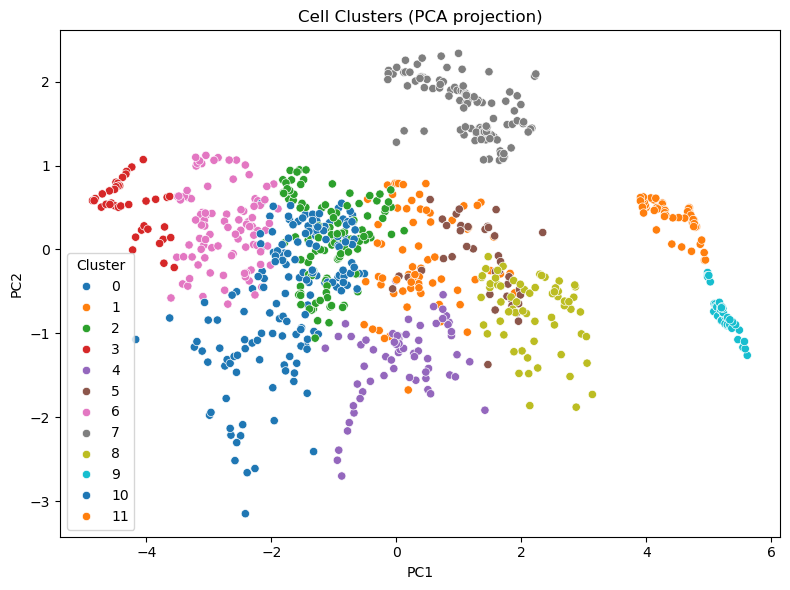


=== Cluster 0 ===
📦 Training Ridge on Cluster 0
📦 Training Lasso on Cluster 0
📦 Training Elastic Net on Cluster 0
📦 Training Random Forest on Cluster 0
📦 Training HistGradientBoosting on Cluster 0
📦 Training XGBoost on Cluster 0

🌲 Cluster 0: Feature Importances for HistGradientBoosting
Area_MA: 0.0851
Perimeter_MA: 0.0734
Extent_MA: 0.0135
Solidity_MA: 0.2591
Compactness_MA: 0.0079
Elongation_MA: 0.1297
Circularity_MA: 0.3366
Convexity_MA: 0.1844

=== Cluster 1 ===
📦 Training Ridge on Cluster 1
📦 Training Lasso on Cluster 1
📦 Training Elastic Net on Cluster 1
📦 Training Random Forest on Cluster 1
📦 Training HistGradientBoosting on Cluster 1
📦 Training XGBoost on Cluster 1

🌲 Cluster 1: Feature Importances for XGBoost
Area_MA: 0.3884
Perimeter_MA: 0.0271
Extent_MA: 0.0192
Solidity_MA: 0.3442
Compactness_MA: -0.0170
Elongation_MA: 0.0043
Circularity_MA: 0.0346
Convexity_MA: 0.8159

=== Cluster 2 ===
📦 Training Ridge on Cluster 2
📦 Training Lasso on Cluster 2
📦 Training Elastic Net on C

In [46]:
def clustered_regression_analysis(csv_path, n_clusters=4, alpha=1.0, l1_ratio=0.5, n_estimators=100):
    """
    Clusters data and runs regression models per cluster (on log-transformed target).
    Automatically selects and visualizes the best model per cluster.
    """
    df = pd.read_csv(csv_path)

    features = ["Area_MA", "Perimeter_MA", "Extent_MA", "Solidity_MA", "Compactness_MA",
                "Elongation_MA", "Circularity_MA", "Convexity_MA"]
    target = "X_Centroid_Velocity_MA"
    df.dropna(subset=features + [target], inplace=True)

    # Standardize features for clustering
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df[features])

    # PCA for visualization
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    # KMeans Clustering
    print(f"\n🔍 Clustering data into {n_clusters} groups...")
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df["Cluster"] = kmeans.fit_predict(X_scaled)

    # Visualize clusters
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df["Cluster"], palette="tab10")
    plt.title("Cell Clusters (PCA projection)")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend(title="Cluster")
    plt.tight_layout()
    plt.show()

    # Log-transform target (with shift)
    y_min = df[target].min()
    shift_val = -y_min + 1
    df["target_log"] = np.log1p(df[target] + shift_val)

    all_results = []
    best_models = []

    for cluster_id in sorted(df["Cluster"].unique()):
        print(f"\n=== Cluster {cluster_id} ===")
        sub_df = df[df["Cluster"] == cluster_id].copy()

        X = sub_df[features]
        y_log = sub_df["target_log"]

        if len(sub_df) < 10:
            print(f"⚠️ Cluster {cluster_id} has too few samples ({len(sub_df)}). Skipping.")
            continue

        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_log, test_size=0.1, random_state=42)

        models = {
            "Ridge": Ridge(alpha=alpha),
            "Lasso": Lasso(alpha=alpha),
            "Elastic Net": ElasticNet(alpha=alpha, l1_ratio=l1_ratio),
            "Random Forest": RandomForestRegressor(n_estimators=n_estimators, random_state=42),
            "HistGradientBoosting": HistGradientBoostingRegressor(random_state=42),
            "XGBoost": XGBRegressor(n_estimators=n_estimators, learning_rate=0.1, random_state=42)
        }

        cluster_results = []
        predictions_by_model = {}

        for name, model in models.items():
            print(f"📦 Training {name} on Cluster {cluster_id}")
            model.fit(X_train, y_train)
            y_pred_log = model.predict(X_test)

            y_pred = np.expm1(y_pred_log) - shift_val
            y_true = np.expm1(y_test) - shift_val

            mse = mean_squared_error(y_true, y_pred)
            r2 = r2_score(y_true, y_pred)

            cluster_results.append({
                "Cluster": cluster_id,
                "Model": name,
                "Samples": len(sub_df),
                "MSE": mse,
                "R2": r2
            })

            predictions_by_model[name] = {
                "y_true": y_true,
                "y_pred": y_pred,
                "X_test": X_test,
                "y_test": y_test,
                "model": model
            }

        all_results.extend(cluster_results)

        best = max(cluster_results, key=lambda x: x["R2"])
        best_model_name = best["Model"]
        best_models.append({
            "Cluster": best["Cluster"],
            "Best Model": best_model_name,
            "Best R2": best["R2"],
            "MSE": best["MSE"],
            "Samples": best["Samples"]
        })

        # === Plotting for best model ===
        y_true = predictions_by_model[best_model_name]["y_true"]
        y_pred = predictions_by_model[best_model_name]["y_pred"]
        model = predictions_by_model[best_model_name]["model"]
        X_test = predictions_by_model[best_model_name]["X_test"]
        y_test = predictions_by_model[best_model_name]["y_test"]

        # Residual Plot
        residuals = y_true - y_pred
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=y_pred, y=residuals)
        plt.axhline(0, color="red", linestyle="--")
        plt.title(f"Cluster {cluster_id} - {best_model_name} Residuals")
        plt.xlabel("Predicted")
        plt.ylabel("Residuals")
        plt.tight_layout()
        # plt.show()
        plt.close()

        # Actual vs Predicted
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=y_true, y=y_pred)
        plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
        plt.title(f"Cluster {cluster_id} - {best_model_name}: Actual vs Predicted")
        plt.xlabel("Actual")
        plt.ylabel("Predicted")
        plt.tight_layout()
        # plt.show()
        plt.close()

        # Feature importances (fixed to avoid multiprocessing issue)
        if best_model_name in ["Random Forest", "HistGradientBoosting", "XGBoost"]:
            print(f"\n🌲 Cluster {cluster_id}: Feature Importances for {best_model_name}")
            result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=1)
            importances = result.importances_mean

            for feat, score in zip(features, importances):
                print(f"{feat}: {score:.4f}")

            plt.figure(figsize=(6, 4))
            sns.barplot(x=importances, y=features)
            plt.title(f"Cluster {cluster_id} - {best_model_name} Feature Importance")
            plt.tight_layout()
            # plt.show()
            plt.close()

    result_df = pd.DataFrame(all_results)
    best_df = pd.DataFrame(best_models)

    print("\n📋 Full Model Performance by Cluster:")
    print(result_df.sort_values(["Cluster", "R2"], ascending=[True, False]))

    print("\n🏆 Best Model per Cluster:")
    print(best_df)

    return result_df, best_df




window_size = 5  # Change if needed

# output_directory = "/home/MinaHossain/EmbedTrack/Cell_Frame-Video/Track_New_Output"
# csv_path = os.path.join(output_directory, f"Cells_Centroid_Velocity_TrueLabel_MA_Median_{window_size}.csv")


output_directory = "/home/MinaHossain/EmbedTrack/Track_New_Result_Shape/Mean"
csv_path = os.path.join(output_directory, f"Cells_Centroid_Velocity_TrueLabel_MA_Mean_{window_size}.csv")



all_models_df, best_models_df = clustered_regression_analysis( csv_path, n_clusters=12, alpha=0.5, l1_ratio=0.7, n_estimators=100)



In [61]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance

from xgboost import XGBRegressor


def regression_per_cell(csv_path, alpha=1.0, l1_ratio=0.5, n_estimators=100, min_samples=40):
    """
    Runs regression analysis per cell ('Cell Number'), applies log1p to the shifted target,
    and visualizes best model performance for each cell with sufficient data.
    """
    df = pd.read_csv(csv_path)

    features = ["Area_MA", "Perimeter_MA", "Extent_MA", "Solidity_MA", "Compactness_MA",
                "Elongation_MA", "Circularity_MA", "Convexity_MA"]
    target = "X_Centroid_Velocity_MA"
    cell_col = "Cell Number"

    df.dropna(subset=features + [target, cell_col], inplace=True)

    # Shift and log-transform target
    y_min = df[target].min()
    shift_val = -y_min + 1
    df["target_log"] = np.log1p(df[target] + shift_val)

    all_results = []
    best_models = []

    for cell_id in sorted(df[cell_col].unique()):
        sub_df = df[df[cell_col] == cell_id].copy()

        if len(sub_df) < min_samples:
            print(f"⚠️ Skipping Cell {cell_id}: too few samples ({len(sub_df)})")
            continue

        print(f"\n🔬 Analyzing Cell {cell_id} with {len(sub_df)} samples...")

        X = sub_df[features]
        y_log = sub_df["target_log"]

        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_log, test_size=0.20, random_state=42)

        models = {
            "Ridge": Ridge(alpha=alpha),
            "Lasso": Lasso(alpha=alpha),
            "Elastic Net": ElasticNet(alpha=alpha, l1_ratio=l1_ratio),
            "Random Forest": RandomForestRegressor(n_estimators=n_estimators, random_state=42),
            "HistGradientBoosting": HistGradientBoostingRegressor(random_state=42),
            "XGBoost": XGBRegressor(n_estimators=n_estimators, learning_rate=0.1, random_state=42)
        }

        cell_results = []
        predictions_by_model = {}

        for name, model in models.items():
            model.fit(X_train, y_train)
            y_pred_log = model.predict(X_test)

            # Inverse log shift
            y_pred = np.expm1(y_pred_log) - shift_val
            y_true = np.expm1(y_test) - shift_val

            mse = mean_squared_error(y_true, y_pred)
            r2 = r2_score(y_true, y_pred)

            cell_results.append({
                "Cell ID": cell_id,
                "Model": name,
                "Samples": len(sub_df),
                "MSE": mse,
                "R2": r2
            })

            predictions_by_model[name] = {
                "y_true": y_true,
                "y_pred": y_pred,
                "X_test": X_test,
                "y_test": y_test,
                "model": model
            }

        all_results.extend(cell_results)

        # Pick best model for this cell
        best = max(cell_results, key=lambda x: x["R2"])
        best_model_name = best["Model"]
        best_models.append({
            "Cell ID": best["Cell ID"],
            "Best Model": best_model_name,
            "Best R2": best["R2"],
            "MSE": best["MSE"],
            "Samples": best["Samples"]
        })

        # === Plotting for best model ===
        y_true = predictions_by_model[best_model_name]["y_true"]
        y_pred = predictions_by_model[best_model_name]["y_pred"]
        model = predictions_by_model[best_model_name]["model"]
        X_test = predictions_by_model[best_model_name]["X_test"]
        y_test = predictions_by_model[best_model_name]["y_test"]

        # Residual Plot
        residuals = y_true - y_pred
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=y_pred, y=residuals)
        plt.axhline(0, color="red", linestyle="--")
        plt.title(f"Cell {cell_id} - {best_model_name} Residuals")
        plt.xlabel("Predicted")
        plt.ylabel("Residuals")
        plt.tight_layout()
        plt.close()
        # plt.show()

        # Actual vs Predicted
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=y_true, y=y_pred)
        plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
        plt.title(f"Cell {cell_id} - {best_model_name}: Actual vs Predicted")
        plt.xlabel("Actual")
        plt.ylabel("Predicted")
        plt.tight_layout()
        plt.close()
        # plt.show()

        # Feature importances (tree-based only)
        if best_model_name in ["Random Forest", "HistGradientBoosting", "XGBoost"]:
            print(f"\n🌲 Cell {cell_id}: Feature Importances for {best_model_name}")
            try:
                result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
            except Exception as e:
                print(f"⚠️ Falling back to n_jobs=1 due to: {e}")
                result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=1)

            importances = result.importances_mean

            for feat, score in zip(features, importances):
                print(f"{feat}: {score:.4f}")

            plt.figure(figsize=(6, 4))
            sns.barplot(x=importances, y=features)
            plt.title(f"Cell {cell_id} - {best_model_name} Feature Importance")
            plt.tight_layout()
            plt.close()
            # plt.show()

    # Final output
    result_df = pd.DataFrame(all_results)
    best_df = pd.DataFrame(best_models)

    print("\n📋 Full Model Performance by Cell:")
    print(result_df.sort_values(["Cell ID", "R2"], ascending=[True, False]))

    print("\n🏆 Best Model per Cell:")
    print(best_df)

    return result_df, best_df


window_size = 5  # Change if needed

output_directory = "/home/MinaHossain/EmbedTrack/Track_New_Result_Shape/Mean"
csv_path = os.path.join(output_directory, f"Cells_Centroid_Velocity_TrueLabel_MA_Mean_{window_size}.csv")


# output_directory = "/home/MinaHossain/EmbedTrack/Cell_Frame-Video/Reg_Output"
# csv_path = os.path.join(output_directory, f"Cells_Centroid_Velocity_TrueLabel_MA_Mean_{window_size}.csv")
all_df, best_df = regression_per_cell(csv_path, alpha=0.5, l1_ratio=0.7, n_estimators=100, min_samples=40)


⚠️ Skipping Cell 1: too few samples (23)

🔬 Analyzing Cell 2 with 80 samples...

🔬 Analyzing Cell 3 with 99 samples...

🔬 Analyzing Cell 4 with 99 samples...

🌲 Cell 4: Feature Importances for XGBoost
Area_MA: 0.0396
Perimeter_MA: 0.7282
Extent_MA: 0.0956
Solidity_MA: 0.0834
Compactness_MA: 0.0528
Elongation_MA: -0.0548
Circularity_MA: 0.0062
Convexity_MA: 0.0041

🔬 Analyzing Cell 6 with 99 samples...
⚠️ Skipping Cell 7: too few samples (15)

🔬 Analyzing Cell 8 with 99 samples...

🌲 Cell 8: Feature Importances for XGBoost
Area_MA: 0.0228
Perimeter_MA: 0.2392
Extent_MA: 0.1605
Solidity_MA: 0.3980
Compactness_MA: 0.1646
Elongation_MA: 0.2468
Circularity_MA: 0.1009
Convexity_MA: 0.0517

🔬 Analyzing Cell 9 with 99 samples...

🌲 Cell 9: Feature Importances for HistGradientBoosting
Area_MA: 0.1956
Perimeter_MA: -0.0522
Extent_MA: 0.1753
Solidity_MA: 0.0152
Compactness_MA: 0.0508
Elongation_MA: 0.1531
Circularity_MA: 0.0491
Convexity_MA: -0.0125

🔬 Analyzing Cell 10 with 99 samples...

🔬 Anal

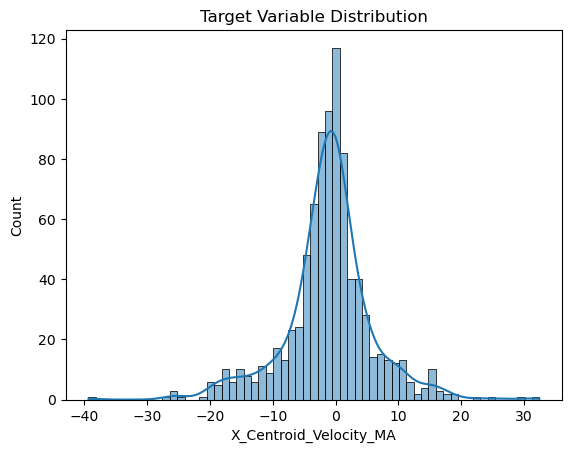

In [5]:


window_size = 5  # Change if needed

# output_directory = "/home/MinaHossain/EmbedTrack/Cell_Frame-Video/Track_New_Output"
# csv_path = os.path.join(output_directory, f"Cells_Centroid_Velocity_TrueLabel_MA_Median_{window_size}.csv")


output_directory = "/home/MinaHossain/EmbedTrack/Track_New_Result_Shape/Mean"
csv_path = os.path.join(output_directory, f"Cells_Centroid_Velocity_TrueLabel_MA_Mean_{window_size}.csv")
df = pd.read_csv(csv_path)
sns.histplot(df["X_Centroid_Velocity_MA"], kde=True)
plt.title("Target Variable Distribution")
plt.show()

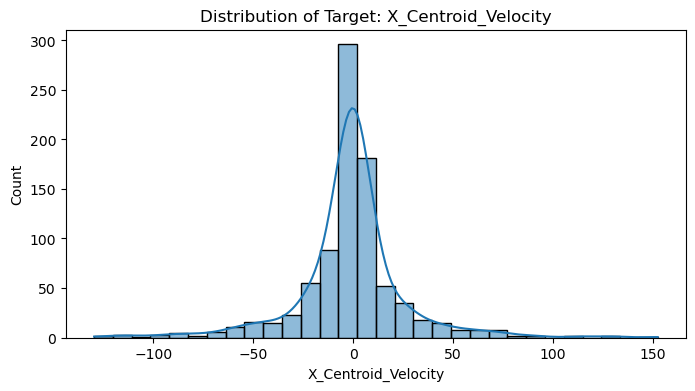


Target Summary:
count    860.000000
mean      -1.255957
std       27.416741
min     -129.707295
25%       -8.575989
50%       -0.669397
75%        6.240818
max      152.398895
Name: X_Centroid_Velocity, dtype: float64


In [7]:
window_size = 5  # Change if needed

# output_directory = "/home/MinaHossain/EmbedTrack/Cell_Frame-Video/Track_New_Output"
# csv_path = os.path.join(output_directory, f"Cells_Centroid_Velocity_TrueLabel_MA_Median_{window_size}.csv")


output_directory = "/home/MinaHossain/EmbedTrack/Track_New_Result_Shape/Mean"
csv_path = os.path.join(output_directory, f"Cells_Centroid_Velocity_Original_TrueLabel_Mean_{window_size}.csv")
df = pd.read_csv(csv_path)

plt.figure(figsize=(8, 4))
sns.histplot(df["X_Centroid_Velocity"], kde=True, bins=30)
plt.title("Distribution of Target: X_Centroid_Velocity")
plt.show()

print("\nTarget Summary:")
print(df["X_Centroid_Velocity"].describe())



🔍 Training: Ridge
📊 Ridge - MSE: 52.2819, R²: -0.0660


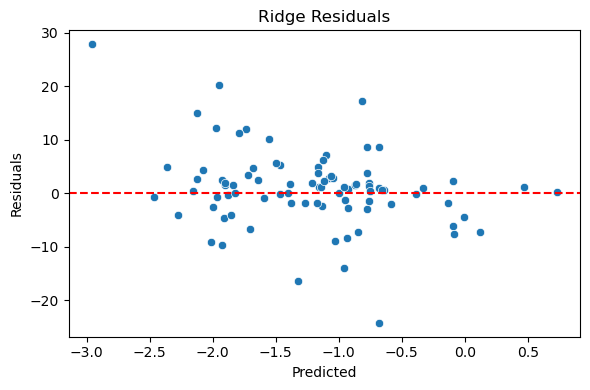

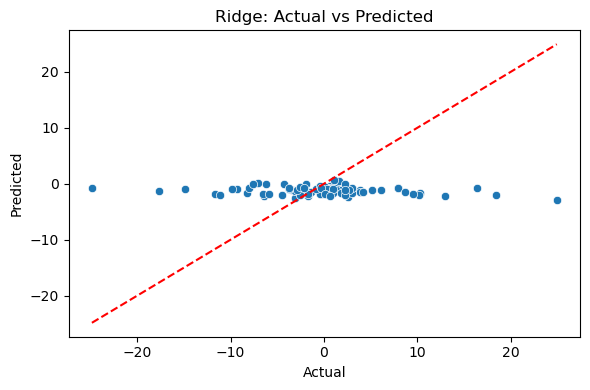


🔍 Training: Lasso
📊 Lasso - MSE: 49.9040, R²: -0.0175


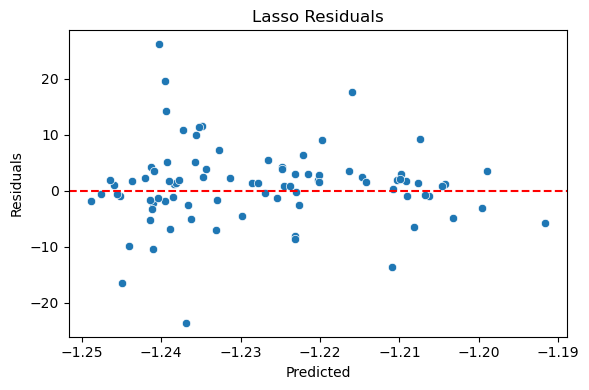

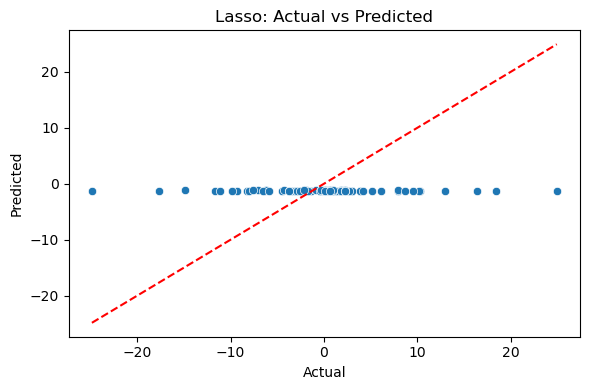


🔍 Training: Elastic Net
📊 Elastic Net - MSE: 49.9533, R²: -0.0185


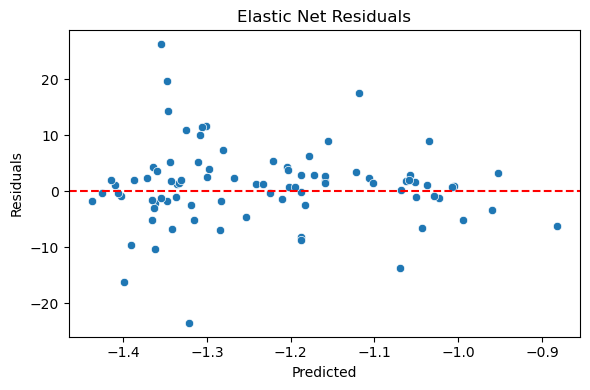

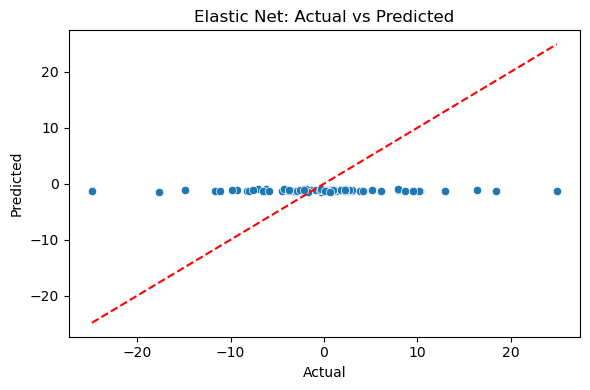


🔍 Training: Random Forest
📊 Random Forest - MSE: 55.9733, R²: -0.1412


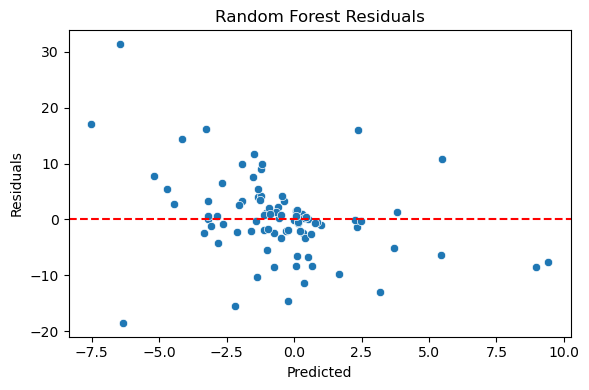

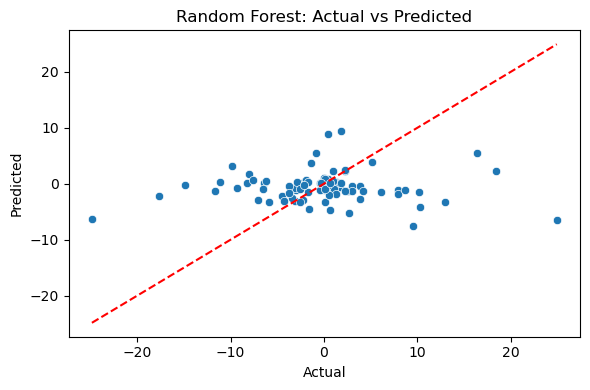


🌲 Calculating Feature Importances (Permutation): Random Forest
Area_MA: 0.0008
Perimeter_MA: 0.0848
Extent_MA: 0.1447
Solidity_MA: -0.0120
Compactness_MA: 0.0770
Elongation_MA: -0.0292
Circularity_MA: 0.0187
Convexity_MA: -0.0788


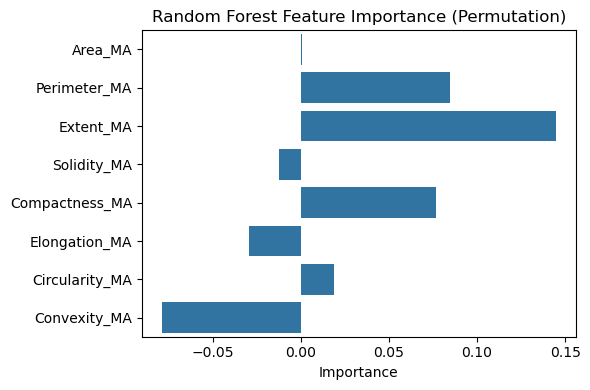


🔍 Training: HistGradientBoosting
📊 HistGradientBoosting - MSE: 63.9834, R²: -0.3046


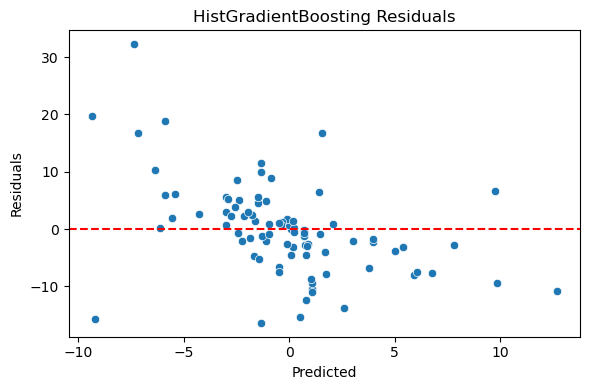

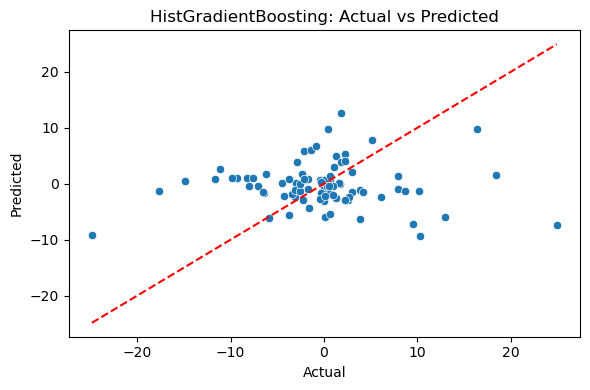


🌲 Calculating Feature Importances (Permutation): HistGradientBoosting
Area_MA: 0.0294
Perimeter_MA: 0.0379
Extent_MA: -0.0692
Solidity_MA: 0.0255
Compactness_MA: 0.1088
Elongation_MA: -0.0146
Circularity_MA: -0.0291
Convexity_MA: -0.1229


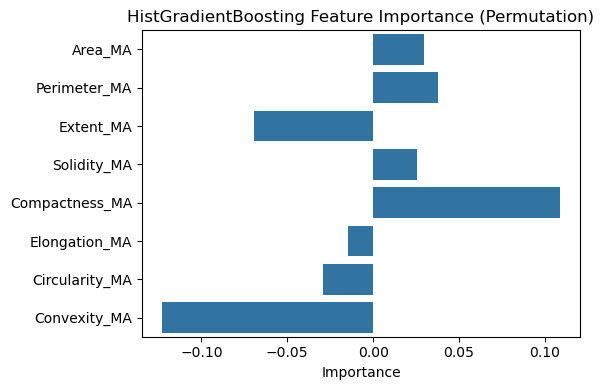


🔍 Training: XGBoost
📊 XGBoost - MSE: 58.3934, R²: -0.1906


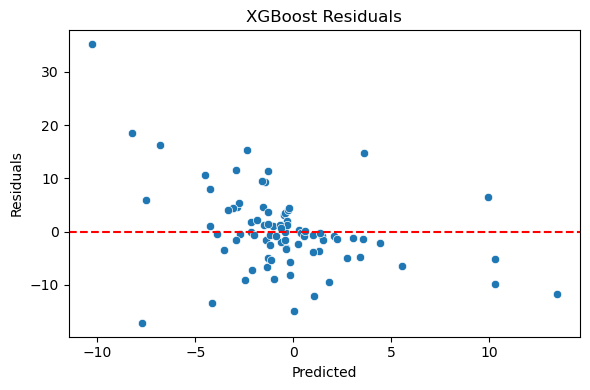

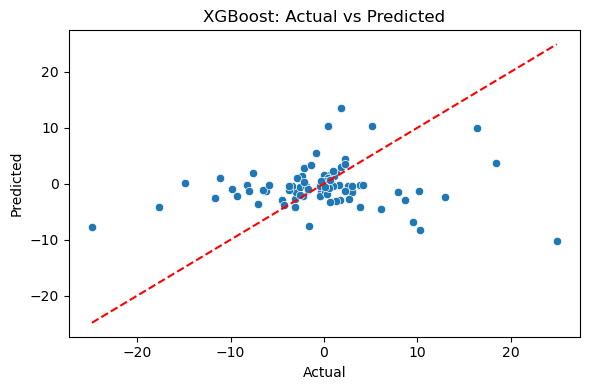


🌲 Calculating Feature Importances (Permutation): XGBoost
Area_MA: 0.0442
Perimeter_MA: 0.1863
Extent_MA: 0.0763
Solidity_MA: -0.0649
Compactness_MA: 0.1975
Elongation_MA: 0.0186
Circularity_MA: 0.0036
Convexity_MA: -0.0368


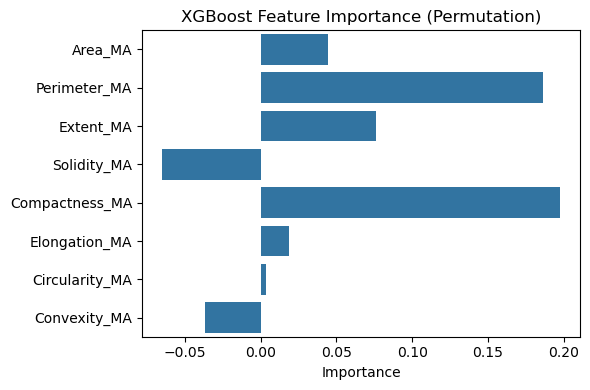


📋 Summary of All Model Performances:
                  Model        MSE        R2
0                 Ridge  52.281940 -0.065983
1                 Lasso  49.904016 -0.017499
2           Elastic Net  49.953275 -0.018503
3         Random Forest  55.973299 -0.141246
4  HistGradientBoosting  63.983430 -0.304566
5               XGBoost  58.393411 -0.190590


In [22]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance

from xgboost import XGBRegressor


def run_all_regressions(csv_path, alpha=1.0, l1_ratio=0.5, n_estimators=100):
    """
    Runs Ridge, Lasso, Elastic Net, Random Forest, HistGradientBoosting, and XGBoost regression models.
    Standardizes features, evaluates performance, and plots results.
    """
    df = pd.read_csv(csv_path)

    features = ["Area_MA", "Perimeter_MA", "Extent_MA", "Solidity_MA", "Compactness_MA",
                "Elongation_MA", "Circularity_MA", "Convexity_MA"]
    target = "X_Centroid_Velocity_MA"

    df.dropna(subset=features + [target], inplace=True)

    X = df[features]
    y = df[target]

    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Train-test split
    if df.shape[0] < 10:
        print(f"\n⚠ Dataset too small for split. Using full data.")
        X_train, X_test, y_train, y_test = X_scaled, X_scaled, y, y
    else:
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

    models = {
        "Ridge": Ridge(alpha=alpha),
        "Lasso": Lasso(alpha=alpha),
        "Elastic Net": ElasticNet(alpha=alpha, l1_ratio=l1_ratio),
        "Random Forest": RandomForestRegressor(n_estimators=n_estimators, random_state=42),
        "HistGradientBoosting": HistGradientBoostingRegressor(random_state=42),
        "XGBoost": XGBRegressor(n_estimators=n_estimators, learning_rate=0.1, random_state=42)
    }

    results = []

    for name, model in models.items():
        print(f"\n🔍 Training: {name}")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        print(f"📊 {name} - MSE: {mse:.4f}, R²: {r2:.4f}")

        results.append({
            "Model": name,
            "MSE": mse,
            "R2": r2
        })

        # Residual Plot
        residuals = y_test - y_pred
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=y_pred, y=residuals)
        plt.axhline(0, color="red", linestyle="--")
        plt.title(f"{name} Residuals")
        plt.xlabel("Predicted")
        plt.ylabel("Residuals")
        plt.tight_layout()
        plt.show()

        # Predicted vs Actual
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=y_test, y=y_pred)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
        plt.title(f"{name}: Actual vs Predicted")
        plt.xlabel("Actual")
        plt.ylabel("Predicted")
        plt.tight_layout()
        plt.show()

        # Feature importances (tree-based models)
        if name in ["Random Forest", "HistGradientBoosting", "XGBoost"]:
            print(f"\n🌲 Calculating Feature Importances (Permutation): {name}")
            result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
            importances = result.importances_mean

            for feat, score in zip(features, importances):
                print(f"{feat}: {score:.4f}")

            plt.figure(figsize=(6, 4))
            sns.barplot(x=importances, y=features)
            plt.title(f"{name} Feature Importance (Permutation)")
            plt.xlabel("Importance")
            plt.tight_layout()
            plt.show()

    # Summary Table
    print("\n📋 Summary of All Model Performances:")
    summary_df = pd.DataFrame(results)
    print(summary_df)

    return summary_df





window_size = 5  # Change if needed

# output_directory = "/home/MinaHossain/EmbedTrack/Cell_Frame-Video/Track_New_Output"
# csv_path = os.path.join(output_directory, f"Cells_Centroid_Velocity_TrueLabel_MA_Median_{window_size}.csv")


output_directory = "/home/MinaHossain/EmbedTrack/Cell_Frame-Video/Reg_Output"
csv_path = os.path.join(output_directory, f"Cells_Centroid_Velocity_TrueLabel_MA_Mean_{window_size}.csv")


summary = run_all_regressions(csv_path, alpha=0.5, l1_ratio=0.7, n_estimators=100)

# reg_results_rf_all = run_all_regressions(csv_path, method="random_forest", n_estimators=100)
# reg_results_rf_all = run_all_regressions(csv_path, method="lasso", n_estimators=100)
# reg_results_rf_all = run_all_regressions(csv_path, method="ridge", n_estimators=100)
# reg_results_rf_all = run_all_regressions(csv_path, method="elastic_net", alpha=0.5, l1_ratio=0.7)

# print("\n⚠️ Rows with NaN in target variable (X_Centroid_Velocity_MA):")
# nan_rows = df[df["X_Centroid_Velocity_MA"].isnull()]
# print(nan_rows)
# print(f"\nTotal NaN rows: {len(nan_rows)}")

# Reg on Original Shape  (Do not need it)


🔍 Data Preview:
   Cell Number  Frame     Area    Perimeter  Solidity    Extent  Circularity  \
0            1     11  26265.0  1853.511760  0.681464  0.470092     0.096072   
1            1     16  28838.0  2041.151370  0.693788  0.527560     0.086981   
2            1     19  15902.0   982.634560  0.799377  0.590275     0.206956   
3            1     20  16554.0  1007.362482  0.820805  0.651476     0.204994   
4            1     21  15973.0  1015.605122  0.806229  0.676449     0.194602   

   Convexity  Elongation  Compactness  Centroid_X  Centroid_Y  \
0   0.972867    0.949683     0.199620  416.328699   65.673476   
1   0.963136    0.957475     0.188757  459.272090   66.781197   
2   0.984825    0.903242     0.285658  311.546092   68.174939   
3   0.978859    0.906398     0.289180  308.513913   67.503740   
4   0.973082    0.912320     0.276314  301.463289   66.831233   

   X_Centroid_Distance  Y_Centroid_Distance  X_Centroid_Velocity  \
0            74.544777             5.897143

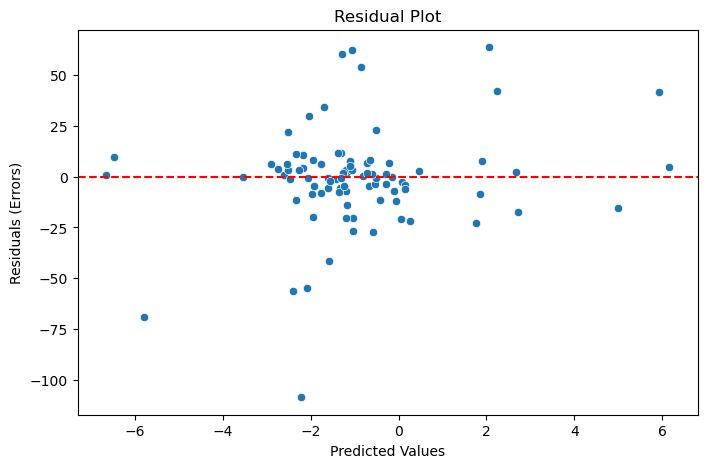

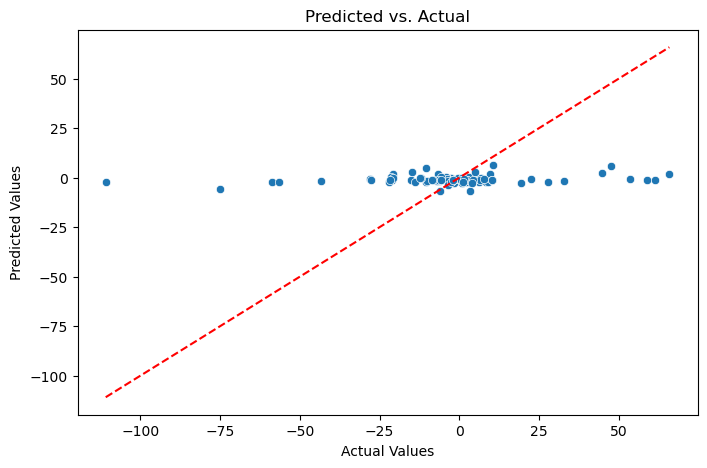


📊 Model Performance:
Mean Squared Error (MSE): 613.8090
R-squared: 0.0347


In [16]:


def run_regression_analysis(csv_path, method="ridge", alpha=1.0, l1_ratio=0.5, n_estimators=100):
    """
    Performs regression analysis on X_Centroid_Velocity with Ridge, Lasso, Elastic Net, or Random Forest regression.
    Runs on all data (ignores cell_id).
    """
    df = pd.read_csv(csv_path)

    print("\n🔍 Data Preview:")
    print(df.head())

    print("\n📊 Dataset Summary:")
    print(df.describe())

    print("\n🔍 Checking for NaN values:")
    print(df.isnull().sum())

    features = ["Area", "Perimeter", "Extent", "Solidity", "Compactness",
                "Elongation", "Circularity", "Convexity"]
    target = "X_Centroid_Velocity"
    print(df[df[target].isnull()])

    print("\n📊 Correlation with Target Variable:")
    print(df[features + [target]].corr()[target].sort_values(ascending=False))

    X = df[features]
    y = df[target]

    if df.shape[0] < 10:
        print(f"\n⚠ Dataset is too small for reliable train-test split ({df.shape[0]} rows). Using entire data for training.")
        X_train, X_test, y_train, y_test = X, X, y, y
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
        print(f"\n📊 Train-Test Split: X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

    method = method.lower()
    if method == "ridge":
        model = Ridge(alpha=alpha)
        print(f"\n🚀 Applying Ridge Regression with alpha={alpha}")
    elif method == "lasso":
        model = Lasso(alpha=alpha)
        print(f"\n🚀 Applying Lasso Regression with alpha={alpha}")
    elif method == "elastic_net":
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        print(f"\n🔗 Applying Elastic Net Regression with alpha={alpha}, l1_ratio={l1_ratio}")
    elif method == "random_forest":
        model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
        print(f"\n🌲 Applying Random Forest Regression with {n_estimators} trees")
    else:
        raise ValueError("Invalid method. Choose 'ridge', 'lasso', 'elastic_net', or 'random_forest'.")

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    y_mean = np.mean(y_train)
    mse_baseline = mean_squared_error(y_test, np.full_like(y_test, y_mean))
    print(f"\n📊 Baseline Model (Predicting Mean): MSE = {mse_baseline:.4f}")

    residuals = y_test - y_pred

    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals (Errors)")
    plt.title("Residual Plot")
    plt.show()

    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Predicted vs. Actual")
    plt.show()

    print("\n📊 Model Performance:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R-squared: {r2:.4f}")

    if method == "random_forest":
        print("\n🌟 Feature Importances (Random Forest):")
        importances = model.feature_importances_
        for feat, score in zip(features, importances):
            print(f"{feat}: {score:.4f}")

        plt.figure(figsize=(8, 6))
        sns.barplot(x=importances, y=features)
        plt.title("Feature Importance (Random Forest)")
        plt.xlabel("Importance Score")
        plt.ylabel("Features")
        plt.tight_layout()
        plt.show()

    return 







window_size = 5  # Change if needed

# output_directory = "/home/MinaHossain/EmbedTrack/Cell_Frame-Video/Track_New_Output"
# csv_path = os.path.join(output_directory, f"Cells_Centroid_Velocity_Original_TrueLabel_Median_{window_size}.csv")


output_directory = "/home/MinaHossain/EmbedTrack/Cell_Frame-Video/Reg_Output"
csv_path = os.path.join(output_directory, f"Cells_Centroid_Velocity_Original_TrueLabel_Mean_{window_size}.csv")


# reg_results_rf_all = run_regression_analysis(csv_path, method="random_forest", n_estimators=100)
# reg_results_rf_all = run_regression_analysis(csv_path, method="lasso", n_estimators=100)
# reg_results_rf_all = run_regression_analysis(csv_path, method="ridge", n_estimators=100)
reg_results_rf_all = run_regression_analysis(csv_path, method="elastic_net", alpha=0.5, l1_ratio=0.7)
# print("\n⚠️ Rows with NaN in target variable (X_Centroid_Velocity_MA):")
# nan_rows = df[df["X_Centroid_Velocity_MA"].isnull()]
# print(nan_rows)
# print(f"\nTotal NaN rows: {len(nan_rows)}")




🔍 Data Preview:
   Cell Number  Frame     Area    Perimeter  Solidity    Extent  Circularity  \
0            1     11  26265.0  1853.511760  0.681464  0.470092     0.096072   
1            1     16  28838.0  2041.151370  0.693788  0.527560     0.086981   
2            1     19  15902.0   982.634560  0.799377  0.590275     0.206956   
3            1     20  16554.0  1007.362482  0.820805  0.651476     0.204994   
4            1     21  15973.0  1015.605122  0.806229  0.676449     0.194602   

   Convexity  Elongation  Compactness  ...  Compactness_MA  Elongation_MA  \
0   0.972867    0.949683     0.199620  ...        0.199620       0.949683   
1   0.963136    0.957475     0.188757  ...        0.194188       0.953579   
2   0.984825    0.903242     0.285658  ...        0.224678       0.936800   
3   0.978859    0.906398     0.289180  ...        0.240804       0.929199   
4   0.973082    0.912320     0.276314  ...        0.247906       0.925824   

   Circularity_MA  Convexity_MA  Centro

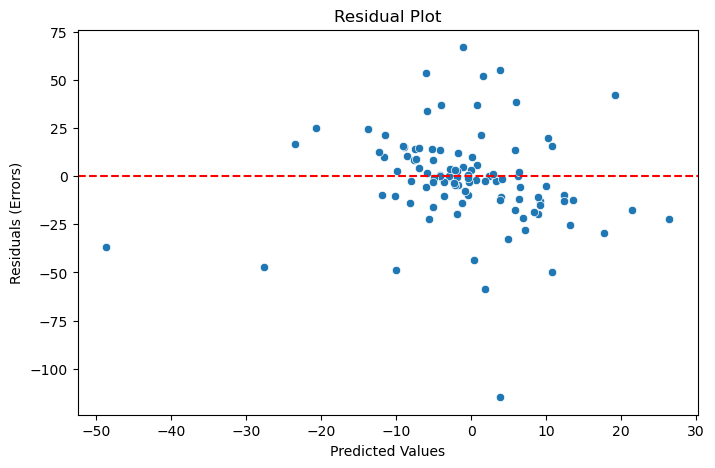

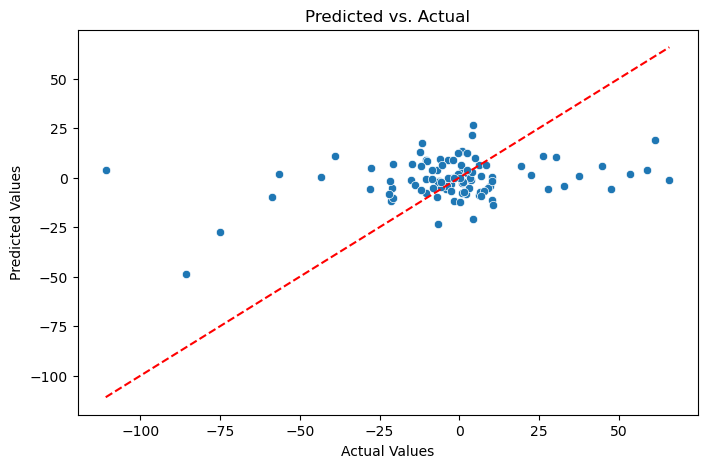


📊 Model Performance:
Mean Squared Error (MSE): 595.8733
R-squared: 0.0765

🌟 Feature Importances (Random Forest):
Area: 0.1597
Perimeter: 0.1181
Extent: 0.1486
Solidity: 0.1319
Compactness: 0.0944
Elongation: 0.1287
Circularity: 0.1061
Convexity: 0.1127


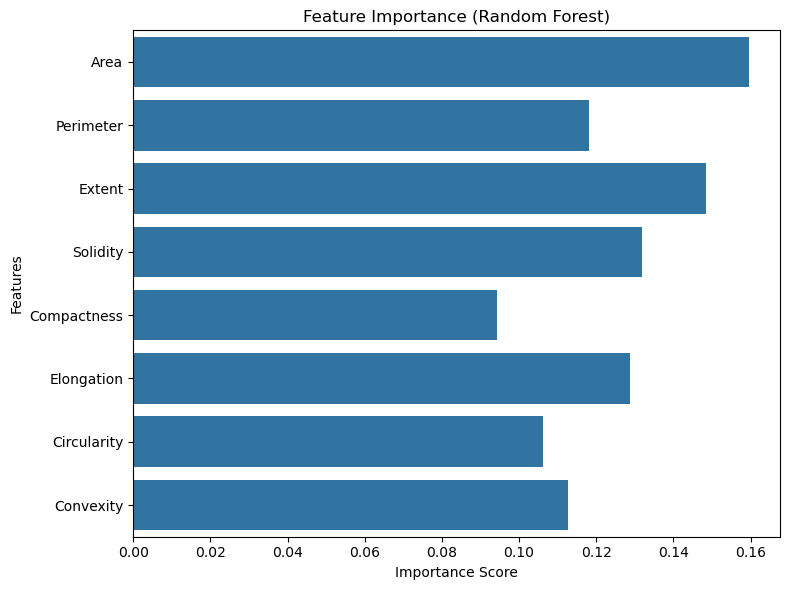

In [11]:



def run_regression_analysis(csv_path, method="ridge", alpha=1.0, n_estimators=100):
    """
    Performs regression analysis on X_Centroid_Velocity with Ridge, Lasso, or Random Forest regression.
    Runs on all data (ignores cell_id).
    """
    df = pd.read_csv(csv_path)

    print("\n🔍 Data Preview:")
    print(df.head())

    print("\n📊 Dataset Summary:")
    print(df.describe())

    print("\n🔍 Checking for NaN values:")
    print(df.isnull().sum())

    features = ["Area", "Perimeter", "Extent", "Solidity", "Compactness",
                "Elongation", "Circularity", "Convexity"]
    target = "X_Centroid_Velocity"
    print(df[df[target].isnull()])

    print("\n📊 Correlation with Target Variable:")
    print(df[features + [target]].corr()[target].sort_values(ascending=False))

    X = df[features]
    y = df[target]

    # print(y)

    if df.shape[0] < 10:
        print(f"\n⚠ Dataset is too small for reliable train-test split ({df.shape[0]} rows). Using entire data for training.")
        X_train, X_test, y_train, y_test = X, X, y, y
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.12, random_state=42)
        print(f"\n📊 Train-Test Split: X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

    if method.lower() == "ridge":
        model = Ridge(alpha=alpha)
        print(f"\n🚀 Applying Ridge Regression with alpha={alpha}")
    elif method.lower() == "lasso":
        model = Lasso(alpha=alpha)
        print(f"\n🚀 Applying Lasso Regression with alpha={alpha}")
    elif method.lower() == "random_forest":
        model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
        print(f"\n🌲 Applying Random Forest Regression with {n_estimators} trees")
    else:
        raise ValueError("Invalid method. Choose 'ridge', 'lasso', or 'random_forest'.")

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    y_mean = np.mean(y_train)
    mse_baseline = mean_squared_error(y_test, np.full_like(y_test, y_mean))
    print(f"\n📊 Baseline Model (Predicting Mean): MSE = {mse_baseline:.4f}")

    residuals = y_test - y_pred

    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals (Errors)")
    plt.title("Residual Plot")
    plt.show()

    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Predicted vs. Actual")
    plt.show()

    print("\n📊 Model Performance:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R-squared: {r2:.4f}")

    if method.lower() == "random_forest":
        print("\n🌟 Feature Importances (Random Forest):")
        importances = model.feature_importances_
        for feat, score in zip(features, importances):
            print(f"{feat}: {score:.4f}")

        plt.figure(figsize=(8, 6))
        sns.barplot(x=importances, y=features)
        plt.title("Feature Importance (Random Forest)")
        plt.xlabel("Importance Score")
        plt.ylabel("Features")
        plt.tight_layout()
        plt.show()

    return model






window_size = 5    # change if needed
# output_directory = "/home/MinaHossain/EmbedTrack/Cell_Frame-Video/Track_New_Output"
# csv_path = os.path.join(output_directory, f"Cells_Centroid_Velocity_Original_TrueLabel_Median_{window_size}.csv")


output_directory = "/home/MinaHossain/EmbedTrack/Cell_Frame-Video/Reg_Output"
csv_path = os.path.join(output_directory, f"Cells_Centroid_Velocity_TrueLabel_MA_Mean_{window_size}.csv")


reg_results_rf_all = run_regression_analysis(csv_path, method="random_forest", n_estimators=500)
# reg_results_rf_all = run_regression_analysis(csv_path, method="lasso", n_estimators=100)
# reg_results_rf_all = run_regression_analysis(csv_path, method="ridge", n_estimators=100)
# print("\n⚠️ Rows with NaN in target variable (X_Centroid_Velocity_MA):")
# nan_rows = df[df["X_Centroid_Velocity_MA"].isnull()]
# print(nan_rows)
# print(f"\nTotal NaN rows: {len(nan_rows)}")


In [18]:
# import pandas as pd

# # Define file path
# csv_path = "/home/MinaHossain/EmbedTrack/Cell_Frame-Video/Shape_Measure-Median/Cells_Centroid_Velocity_TrueLabel_MA_Median_5.csv"

# # Load the CSV
# df = pd.read_csv(csv_path)

# # Extract the target column
# target_column = "X_Centroid_Velocity_MA"
# y = df[target_column]

# # Show first 5 values
# print("\n🎯 Target Column Preview:")
# print(y.head())

# # Check for NaNs
# print("\n🧪 Number of NaN values in the target column:")
# print(y.isnull().sum())

# nan_rows = df[df["X_Centroid_Velocity_MA"].isnull()]

# print("\n🔍 Rows with NaN in target column:")
# print(nan_rows)



🔍 Data Preview:
   Cell Number  Frame     Area    Perimeter  Solidity    Extent  Circularity  \
0            1     11  26265.0  1853.511760  0.681464  0.470092     0.096072   
1            1     16  28838.0  2041.151370  0.693788  0.527560     0.086981   
2            1     19  15902.0   982.634560  0.799377  0.590275     0.206956   
3            1     20  16554.0  1007.362482  0.820805  0.651476     0.204994   
4            1     21  15973.0  1015.605122  0.806229  0.676449     0.194602   

   Convexity  Elongation  Compactness  ...  Compactness_MA  Elongation_MA  \
0   0.972867    0.949683     0.199620  ...        0.199620       0.949683   
1   0.963136    0.957475     0.188757  ...        0.194188       0.953579   
2   0.984825    0.903242     0.285658  ...        0.224678       0.936800   
3   0.978859    0.906398     0.289180  ...        0.240804       0.929199   
4   0.973082    0.912320     0.276314  ...        0.247906       0.925824   

   Circularity_MA  Convexity_MA  Centro

/home/MinaHossain/anaconda3/envs/Shp_chc/lib/python3.12/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)



✅ Best Hyperparameters:
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
✅ Best Cross-Validated R²: 0.0880


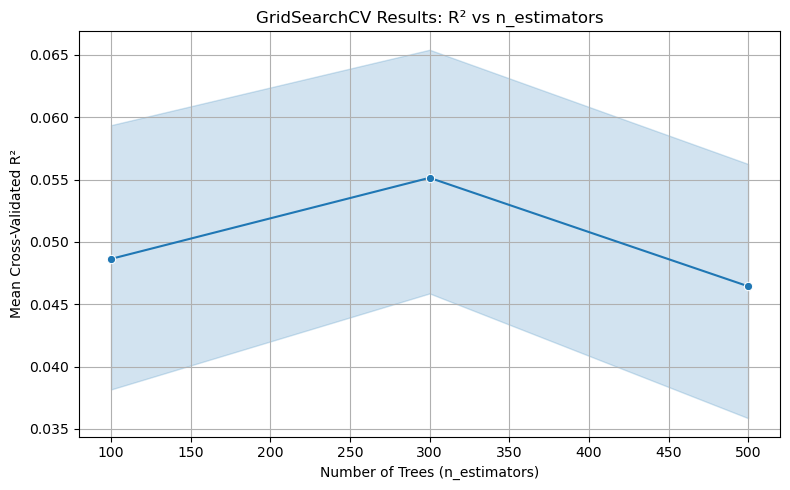

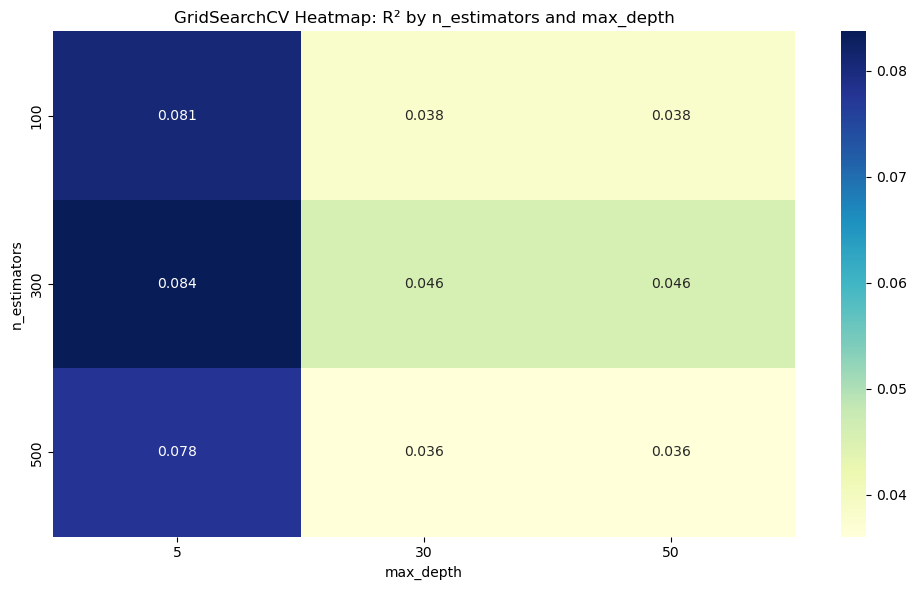


📊 Final Model Performance:
Mean Squared Error (MSE): 34.2437
R-squared: -0.1135


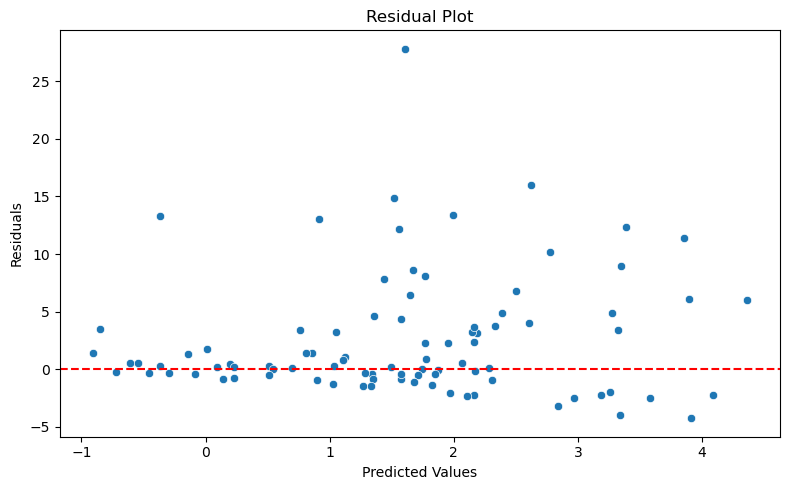

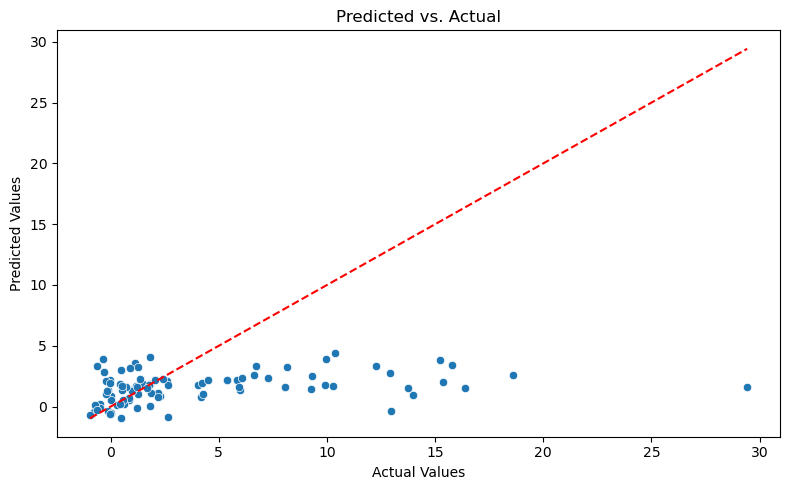

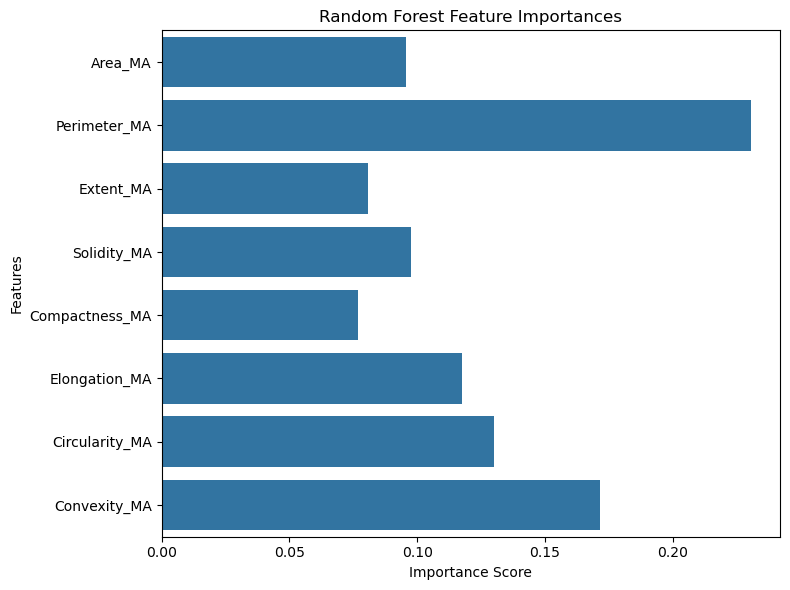

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

def run_enhanced_rf_regression(csv_path):
    """
    Enhanced Regression Pipeline using Random Forest + GridSearchCV with standardization, target transformation,
    and bulletproof NaN handling.
    """
    df = pd.read_csv(csv_path)

    print("\n🔍 Data Preview:")
    print(df.head())

    print("\n📊 Dataset Summary:")
    print(df.describe())

    print("\n🔍 Checking for NaN values:")
    print(df.isnull().sum())

    features = [
        "Area_MA", "Perimeter_MA", "Extent_MA", "Solidity_MA", "Compactness_MA",
        "Elongation_MA", "Circularity_MA", "Convexity_MA"]
    target = "X_Centroid_Velocity_MA"

    # === Check column existence ===
    missing_cols = [col for col in features + [target] if col not in df.columns]
    if missing_cols:
        raise ValueError(f"Missing columns in the CSV: {missing_cols}")

    # === Drop NaNs only for selected features and target ===
    df = df.dropna(subset=features + [target]).copy()

    print("\n📊 Correlation with Target Variable:")
    print(df[features + [target]].corr()[target].sort_values(ascending=False))

    # === Standardize Features ===
    scaler = StandardScaler()
    X = df[features]
    X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=features)

    # === Target Transformation ===
    y = df[target]
    y = np.log1p(y)  # log1p transformation

    # Final check for any remaining NaNs
    if np.any(np.isnan(y)):
        print("⚠ Still NaNs in y after transformation. Dropping those rows now...")
        non_nan_idx = ~np.isnan(y)
        X_scaled = X_scaled[non_nan_idx]
        y = y[non_nan_idx]

    # === Train-Test Split ===
    if len(y) < 10:
        print("\n⚠ Too few samples for reliable train/test split. Using entire dataset.")
        X_train, X_test, y_train, y_test = X_scaled, X_scaled, y, y
    else:
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=44)
        print(f"\n📊 Train-Test Split: X_train: {X_train.shape}, X_test: {X_test.shape}")

    # Final sanity check
    print(f"\n✅ NaNs in y_train: {np.isnan(y_train).sum()}, y_test: {np.isnan(y_test).sum()}")

    # === Random Forest with GridSearchCV ===
    rf_model = RandomForestRegressor(random_state=42)

    param_grid = {
        "n_estimators": [100, 300, 500,1000],
        "max_depth": [None, 5, 30, 50],
        "min_samples_split": [2, 10,50,100],
        "min_samples_leaf": [1, 2,3,4]
    }

    grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                               scoring='r2', cv=10, n_jobs=-1, verbose=1)

    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    print("\n✅ Best Hyperparameters:")
    print(grid_search.best_params_)
    print(f"✅ Best Cross-Validated R²: {grid_search.best_score_:.4f}")

    # === GridSearch Results Plot ===
    cv_results = pd.DataFrame(grid_search.cv_results_)

    # Lineplot: R² vs n_estimators
    plt.figure(figsize=(8, 5))
    sns.lineplot(data=cv_results, x="param_n_estimators", y="mean_test_score", marker="o")
    plt.title("GridSearchCV Results: R² vs n_estimators")
    plt.xlabel("Number of Trees (n_estimators)")
    plt.ylabel("Mean Cross-Validated R²")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Heatmap: R² for n_estimators vs max_depth
    pivot = cv_results.pivot_table(index="param_n_estimators", columns="param_max_depth", values="mean_test_score")
    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot, annot=True, fmt=".3f", cmap="YlGnBu")
    plt.title("GridSearchCV Heatmap: R² by n_estimators and max_depth")
    plt.xlabel("max_depth")
    plt.ylabel("n_estimators")
    plt.tight_layout()
    plt.show()

    # === Predict and Evaluate ===
    y_pred_trans = best_model.predict(X_test)
    y_pred = np.expm1(y_pred_trans)  # Reverse log1p
    y_test_orig = np.expm1(y_test)

    mse = mean_squared_error(y_test_orig, y_pred)
    r2 = r2_score(y_test_orig, y_pred)

    print("\n📊 Final Model Performance:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R-squared: {r2:.4f}")

    # === Residuals Plot ===
    residuals = y_test_orig - y_pred
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title("Residual Plot")
    plt.tight_layout()
    plt.show()

    # === Predicted vs Actual Plot ===
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=y_test_orig, y=y_pred)
    plt.plot([y_test_orig.min(), y_test_orig.max()], [y_test_orig.min(), y_test_orig.max()], color='red', linestyle='--')
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Predicted vs. Actual")
    plt.tight_layout()
    plt.show()

    # === Feature Importance Plot ===
    importances = best_model.feature_importances_
    plt.figure(figsize=(8, 6))
    sns.barplot(x=importances, y=features)
    plt.title("Random Forest Feature Importances")
    plt.xlabel("Importance Score")
    plt.ylabel("Features")
    plt.tight_layout()
    plt.show()

    return best_model




# window_size = 5
# frame_num = 30
# output_directory = "/home/MinaHossain/EmbedTrack/PCA_t-SNE_PHATE/"
# csv_path = os.path.join(output_directory, f"Cells_Centroid_Velocity_MA_{window_size}-{frame_num}.csv")


window_size = 5
# output_directory = "/home/MinaHossain/EmbedTrack/Cell_Frame-Video/Track_New_Output"
# csv_path = os.path.join(output_directory, f"Cells_Centroid_Velocity_TrueLabel_MA_Median_{window_size}.csv")

output_directory = "/home/MinaHossain/EmbedTrack/Cell_Frame-Video/Reg_Output"
csv_path = os.path.join(output_directory, f"Cells_Centroid_Velocity_TrueLabel_MA_Mean_{window_size}.csv")

reg_model = run_enhanced_rf_regression(csv_path)




🔍 Data Preview:
   Cell Number  Frame     Area    Perimeter  Solidity    Extent  Circularity  \
0            1     11  26265.0  1853.511760  0.681464  0.470092     0.096072   
1            1     16  28838.0  2041.151370  0.693788  0.527560     0.086981   
2            1     19  15902.0   982.634560  0.799377  0.590275     0.206956   
3            1     20  16554.0  1007.362482  0.820805  0.651476     0.204994   
4            1     21  15973.0  1015.605122  0.806229  0.676449     0.194602   

   Convexity  Elongation  Compactness  Centroid_X  Centroid_Y  \
0   0.972867    0.949683     0.199620  416.328699   65.673476   
1   0.963136    0.957475     0.188757  459.272090   66.781197   
2   0.984825    0.903242     0.285658  311.546092   68.174939   
3   0.978859    0.906398     0.289180  308.513913   67.503740   
4   0.973082    0.912320     0.276314  301.463289   66.831233   

   X_Centroid_Distance  Y_Centroid_Distance  X_Centroid_Velocity  \
0            74.544777             5.897143

/home/MinaHossain/anaconda3/envs/Shp_chc/lib/python3.12/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)



✅ Best Hyperparameters:
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
✅ Best Cross-Validated R²: 0.0332


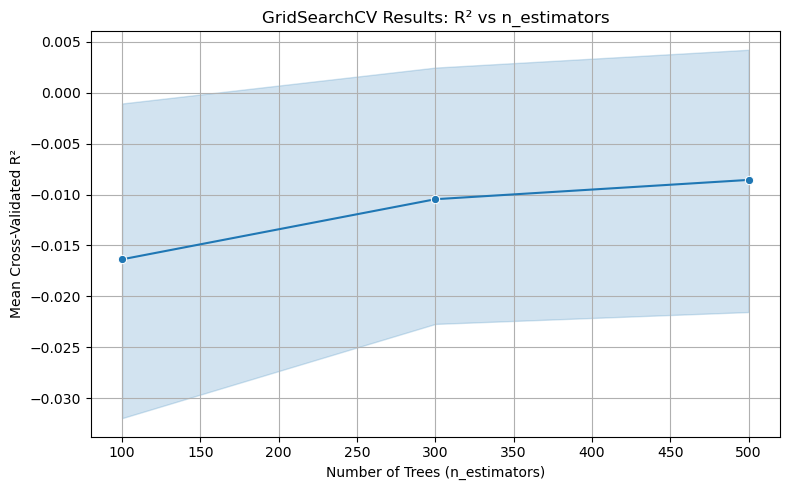

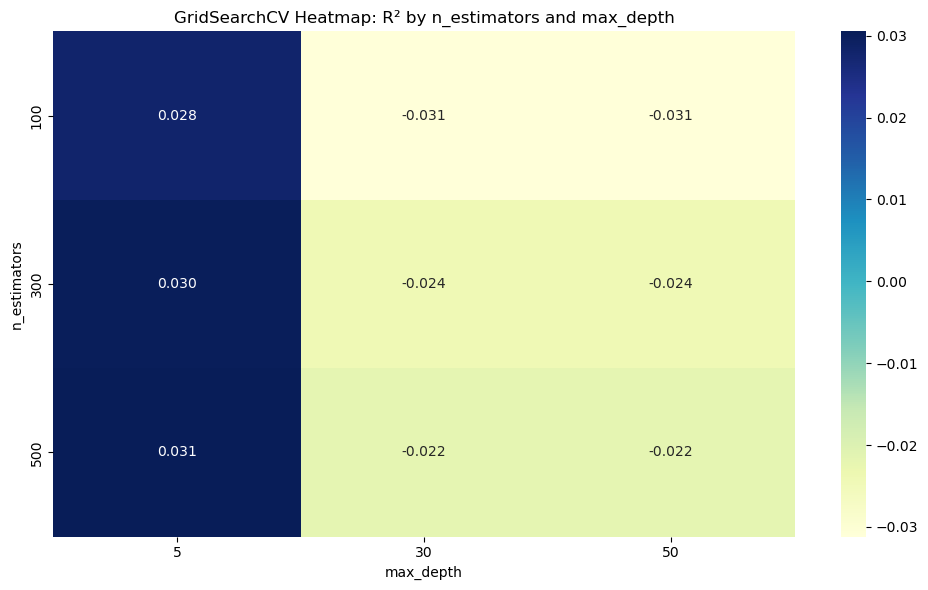


📊 Final Model Performance:
Mean Squared Error (MSE): 249.4938
R-squared: -0.0417


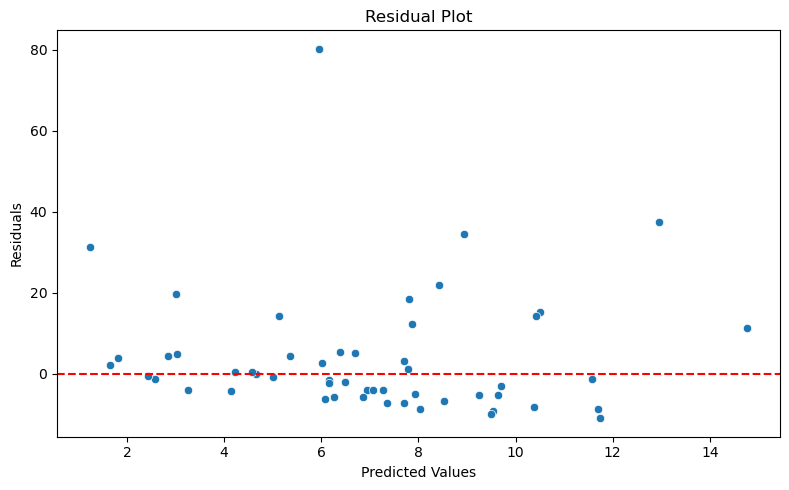

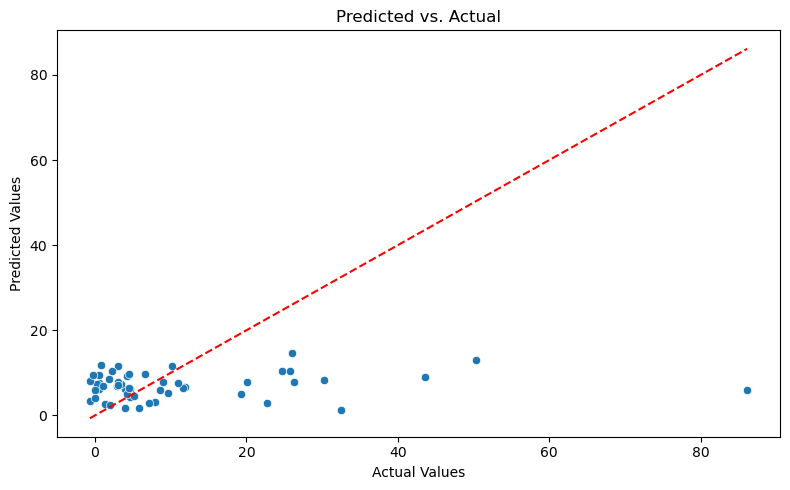

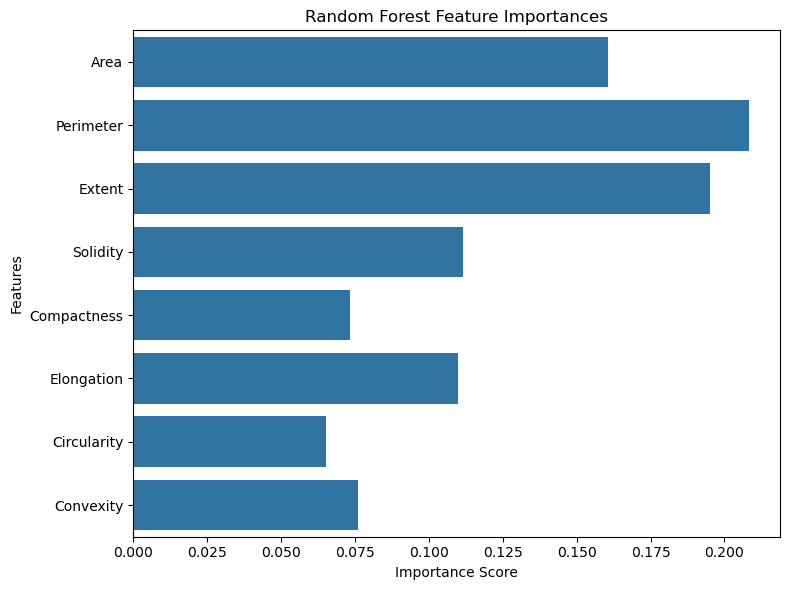

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

def run_enhanced_rf_regression(csv_path):
    """
    Enhanced Regression Pipeline using Random Forest + GridSearchCV with standardization, target transformation,
    and bulletproof NaN handling.
    """
    df = pd.read_csv(csv_path)

    print("\n🔍 Data Preview:")
    print(df.head())

    print("\n📊 Dataset Summary:")
    print(df.describe())

    print("\n🔍 Checking for NaN values:")
    print(df.isnull().sum())

    features = [
        "Area", "Perimeter", "Extent", "Solidity", "Compactness",
        "Elongation", "Circularity", "Convexity"]
    target = "X_Centroid_Velocity"

    # === Check column existence ===
    missing_cols = [col for col in features + [target] if col not in df.columns]
    if missing_cols:
        raise ValueError(f"Missing columns in the CSV: {missing_cols}")

    # === Drop NaNs only for selected features and target ===
    df = df.dropna(subset=features + [target]).copy()

    print("\n📊 Correlation with Target Variable:")
    print(df[features + [target]].corr()[target].sort_values(ascending=False))

    # === Standardize Features ===
    scaler = StandardScaler()
    X = df[features]
    X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=features)

    # === Target Transformation ===
    y = df[target]
    y = np.log1p(y)  # log1p transformation

    # Final check for any remaining NaNs
    if np.any(np.isnan(y)):
        print("⚠ Still NaNs in y after transformation. Dropping those rows now...")
        non_nan_idx = ~np.isnan(y)
        X_scaled = X_scaled[non_nan_idx]
        y = y[non_nan_idx]

    # === Train-Test Split ===
    if len(y) < 10:
        print("\n⚠ Too few samples for reliable train/test split. Using entire dataset.")
        X_train, X_test, y_train, y_test = X_scaled, X_scaled, y, y
    else:
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.12, random_state=44)
        print(f"\n📊 Train-Test Split: X_train: {X_train.shape}, X_test: {X_test.shape}")

    # Final sanity check
    print(f"\n✅ NaNs in y_train: {np.isnan(y_train).sum()}, y_test: {np.isnan(y_test).sum()}")

    # === Random Forest with GridSearchCV ===
    rf_model = RandomForestRegressor(random_state=42)

    param_grid = {
        "n_estimators": [100, 300, 500],
        "max_depth": [None, 5, 30, 50],
        "min_samples_split": [2, 10],
        "min_samples_leaf": [1, 2]
    }

    grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='r2', cv=5, n_jobs=-1, verbose=1)

    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    print("\n✅ Best Hyperparameters:")
    print(grid_search.best_params_)
    print(f"✅ Best Cross-Validated R²: {grid_search.best_score_:.4f}")

    # === GridSearch Results Plot ===
    cv_results = pd.DataFrame(grid_search.cv_results_)

    # Lineplot: R² vs n_estimators
    plt.figure(figsize=(8, 5))
    sns.lineplot(data=cv_results, x="param_n_estimators", y="mean_test_score", marker="o")
    plt.title("GridSearchCV Results: R² vs n_estimators")
    plt.xlabel("Number of Trees (n_estimators)")
    plt.ylabel("Mean Cross-Validated R²")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Heatmap: R² for n_estimators vs max_depth
    pivot = cv_results.pivot_table(index="param_n_estimators", columns="param_max_depth", values="mean_test_score")
    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot, annot=True, fmt=".3f", cmap="YlGnBu")
    plt.title("GridSearchCV Heatmap: R² by n_estimators and max_depth")
    plt.xlabel("max_depth")
    plt.ylabel("n_estimators")
    plt.tight_layout()
    plt.show()

    # === Predict and Evaluate ===
    y_pred_trans = best_model.predict(X_test)
    y_pred = np.expm1(y_pred_trans)  # Reverse log1p
    y_test_orig = np.expm1(y_test)

    mse = mean_squared_error(y_test_orig, y_pred)
    r2 = r2_score(y_test_orig, y_pred)

    print("\n📊 Final Model Performance:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R-squared: {r2:.4f}")

    # === Residuals Plot ===
    residuals = y_test_orig - y_pred
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title("Residual Plot")
    plt.tight_layout()
    plt.show()

    # === Predicted vs Actual Plot ===
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=y_test_orig, y=y_pred)
    plt.plot([y_test_orig.min(), y_test_orig.max()], [y_test_orig.min(), y_test_orig.max()], color='red', linestyle='--')
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Predicted vs. Actual")
    plt.tight_layout()
    plt.show()

    # === Feature Importance Plot ===
    importances = best_model.feature_importances_
    plt.figure(figsize=(8, 6))
    sns.barplot(x=importances, y=features)
    plt.title("Random Forest Feature Importances")
    plt.xlabel("Importance Score")
    plt.ylabel("Features")
    plt.tight_layout()
    plt.show()

    return best_model




# window_size = 5
# frame_num = 30
# output_directory = "/home/MinaHossain/EmbedTrack/PCA_t-SNE_PHATE/"
# csv_path = os.path.join(output_directory, f"Cells_Centroid_Velocity_MA_{window_size}-{frame_num}.csv")


window_size = 5
# output_directory = "/home/MinaHossain/EmbedTrack/Cell_Frame-Video/Track_New_Output"
# # csv_path = os.path.join(output_directory, f"Cells_Centroid_Velocity_TrueLabel_MA_Median_{window_size}.csv")
# csv_path = os.path.join(output_directory, f"Cells_Centroid_Velocity_Original_TrueLabel_Median_{window_size}.csv")

output_directory = "/home/MinaHossain/EmbedTrack/Cell_Frame-Video/Reg_Output"
csv_path = os.path.join(output_directory, f"Cells_Centroid_Velocity_Original_TrueLabel_Mean_{window_size}.csv")

reg_model = run_enhanced_rf_regression(csv_path)



# FNN (SEE the file FNN_Mean.ipynb) Leave the rest.

# /home/MinaHossain/EmbedTrack/Shape_measure/HP4_TRA